<a href="https://colab.research.google.com/github/damar3c50/market_basket_analysis_pizza_sales/blob/main/Analisis_Data_Penjualan_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portofolio/Pizza Sales Analysis/pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
'''
Task : Analisis data penjualan pizza ini dan buatkan laporan dari penjualan pizza ini dan temukan hal2 yang menarik/saran dari data ini yang bisa diaplikasikan di tahun berikutnya !
'''

'\nTask : Analisis data penjualan pizza ini dan buatkan laporan dari penjualan pizza ini dan temukan hal2 yang menarik/saran dari data ini yang bisa diaplikasikan di tahun berikutnya !\n'

#Data Cleaning

In [ ]:
df['order_date'] = df['order_date'].replace(to_replace = '\W',value = '-', regex=True)
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  float64       
 1   order_id           48620 non-null  float64       
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  float64       
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 4.5+ MB


In [ ]:
df['pizza_id'] = df['pizza_id'].astype('int')
df['order_id'] = df['order_id'].astype('int')
df['quantity'] = df['quantity'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.isocalendar().week
df['formatted_time'] = pd.to_datetime(df['order_time']).dt.strftime('%H:00')
df.head()

<ipython-input-8-eac4ba07922a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['formatted_time'] = pd.to_datetime(df['order_time']).dt.strftime('%H:00')


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,week,formatted_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,11:00
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,11:00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,11:00
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,11:00
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,11:00


In [ ]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.to_csv('data_new.csv')

#Explanatory Data Analysis

###Univariate Analysis

<ipython-input-12-a447c6f4889b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, y=x['pizza_name'], x=x['count'], palette='viridis')


<Axes: xlabel='count', ylabel='pizza_name'>

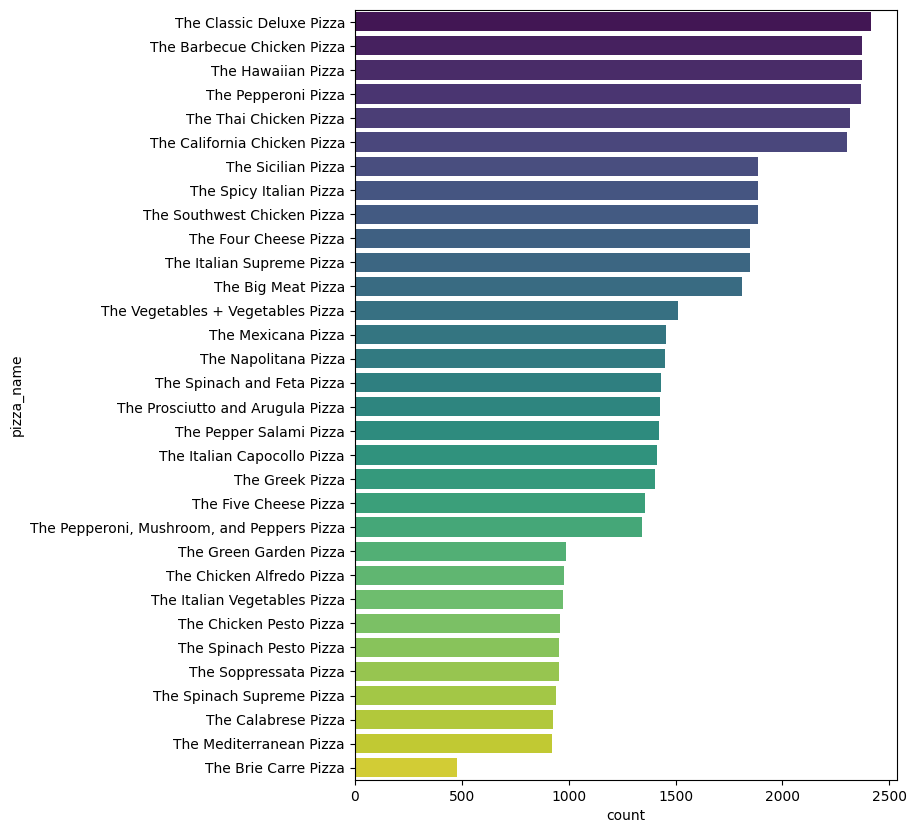

In [ ]:
#Berapa banyak jumlah produk pizza yang terjual selama setahun?
x = df['pizza_name'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(7, 10))
sns.barplot(data=x, y=x['pizza_name'], x=x['count'], palette='viridis')

<ipython-input-13-1eed83a00131>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, y=x['pizza_size'], x=x['count'], palette='viridis')


<Axes: xlabel='count', ylabel='pizza_size'>

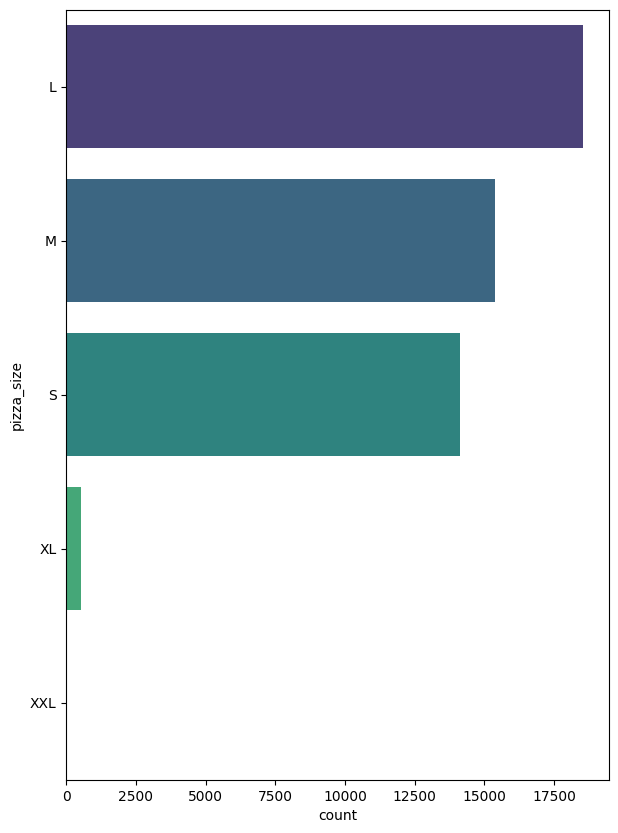

In [ ]:
#Berapa banyak jumlah ukuran pizza yang terjual selama setahun?
x = df['pizza_size'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(7, 10))
sns.barplot(data=x, y=x['pizza_size'], x=x['count'], palette='viridis')

<ipython-input-14-2dd255d1fa19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, y=x['pizza_category'], x=x['count'], palette='viridis')


<Axes: xlabel='count', ylabel='pizza_category'>

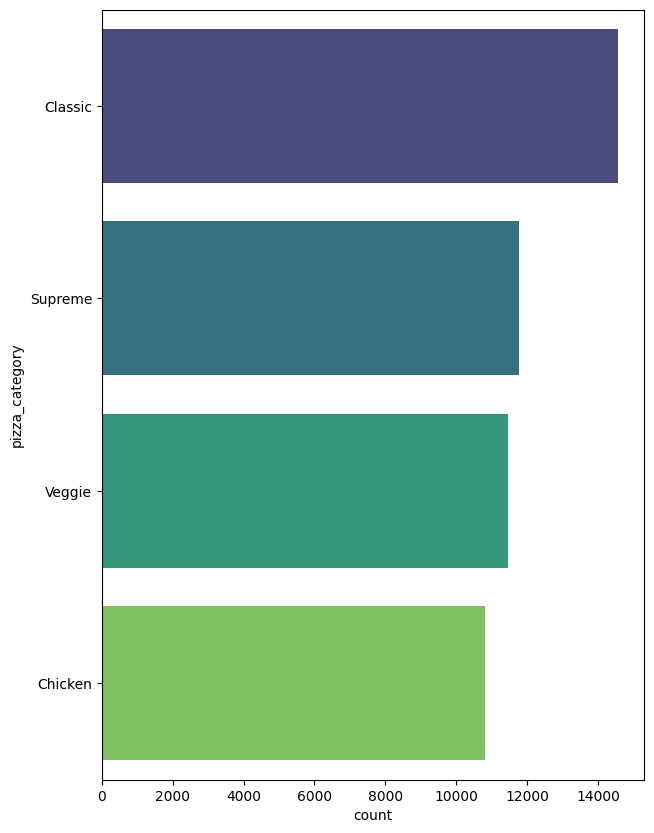

In [ ]:
#Berapa banyak jumlah kategori pizza yang terjual selama setahun?
x = df['pizza_category'].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(7, 10))
sns.barplot(data=x, y=x['pizza_category'], x=x['count'], palette='viridis')

In [ ]:
'''
- The Classic Deluxe Pizza, The Barbeque Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza, The Thai Chicken Pizza merupakan pizza yang sering dibeli
- Ukuran pizza yang sering dibeli adalah ukuran L
- Customer suka membeli pizza yang memiliki kategori Classic
'''

'\n- The Classic Deluxe Pizza, The Barbeque Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza, The Thai Chicken Pizza merupakan pizza yang sering dibeli\n- Ukuran pizza yang sering dibeli adalah ukuran L\n- Customer suka membeli pizza yang memiliki kategori Classic\n'

###Bivariate Analysis

In [ ]:
# Numeric vs Numeric


<Axes: xlabel='pizza_id', ylabel='pizza_name_id'>

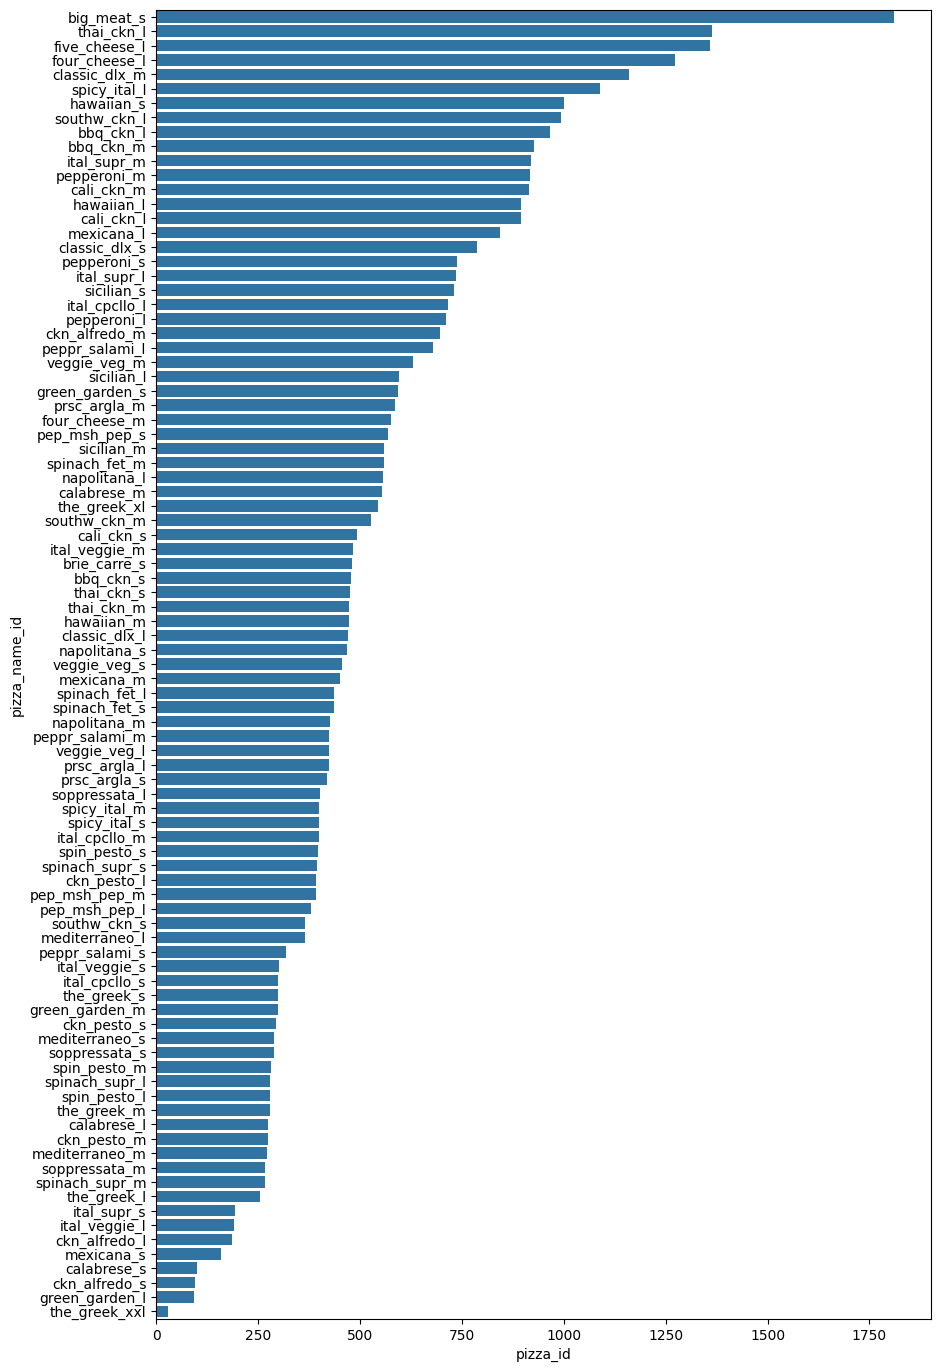

In [ ]:
#Numeric vs Categorical
fig = plt.subplots(figsize=(10,17))
x = df.groupby('pizza_name_id')['pizza_id'].count().reset_index().sort_values(by='pizza_id', ascending=False)
sns.barplot(data=x, x=x['pizza_id'], y=x['pizza_name_id'])

<ipython-input-18-e945493aca76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, x=x['quantity'], y=x['pizza_id'], palette='plasma')


<Axes: xlabel='quantity', ylabel='pizza_id'>

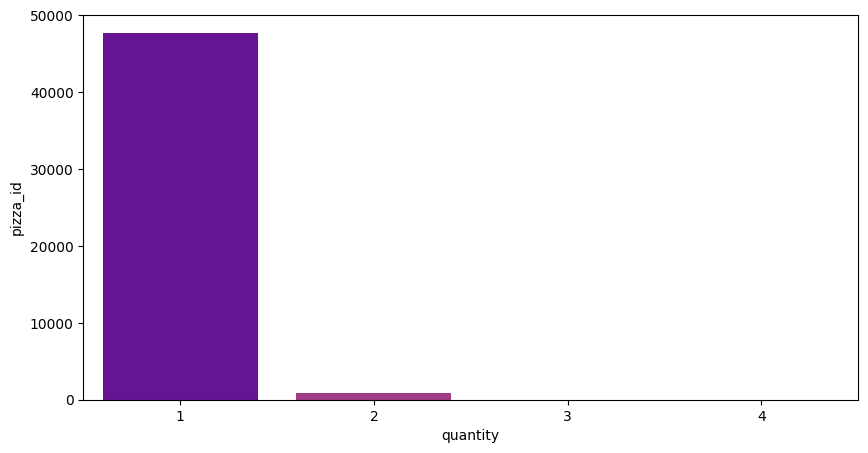

In [ ]:
fig = plt.subplots(figsize=(10,5))
x = df.groupby('quantity')['pizza_id'].count().reset_index()
sns.barplot(data=x, x=x['quantity'], y=x['pizza_id'], palette='plasma')

<ipython-input-19-b84c72aee642>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x, x=x['pizza_size'], y=x['pizza_category'], palette='plasma')


<Axes: xlabel='pizza_size', ylabel='pizza_category'>

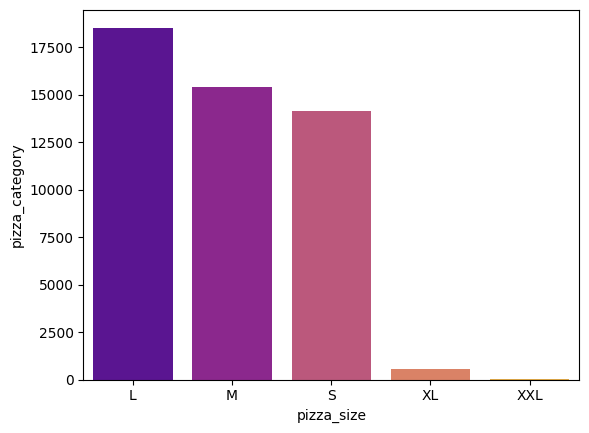

In [ ]:
#Categorical vs Categorical
x = df.groupby(['pizza_size'])['pizza_category'].count().reset_index()
sns.barplot(data=x, x=x['pizza_size'], y=x['pizza_category'], palette='plasma')


In [ ]:
'''
- Pizza The Big Meat dengan ukuran L paling sering dibeli oleh customer
- Jumlah pizza yang sering dibeli oleh customer adalah 1
'''

'\n- Pizza The Big Meat dengan ukuran L paling sering dibeli oleh customer\n- Jumlah pizza yang sering dibeli oleh customer adalah 1\n'

###Multivariate Analysis

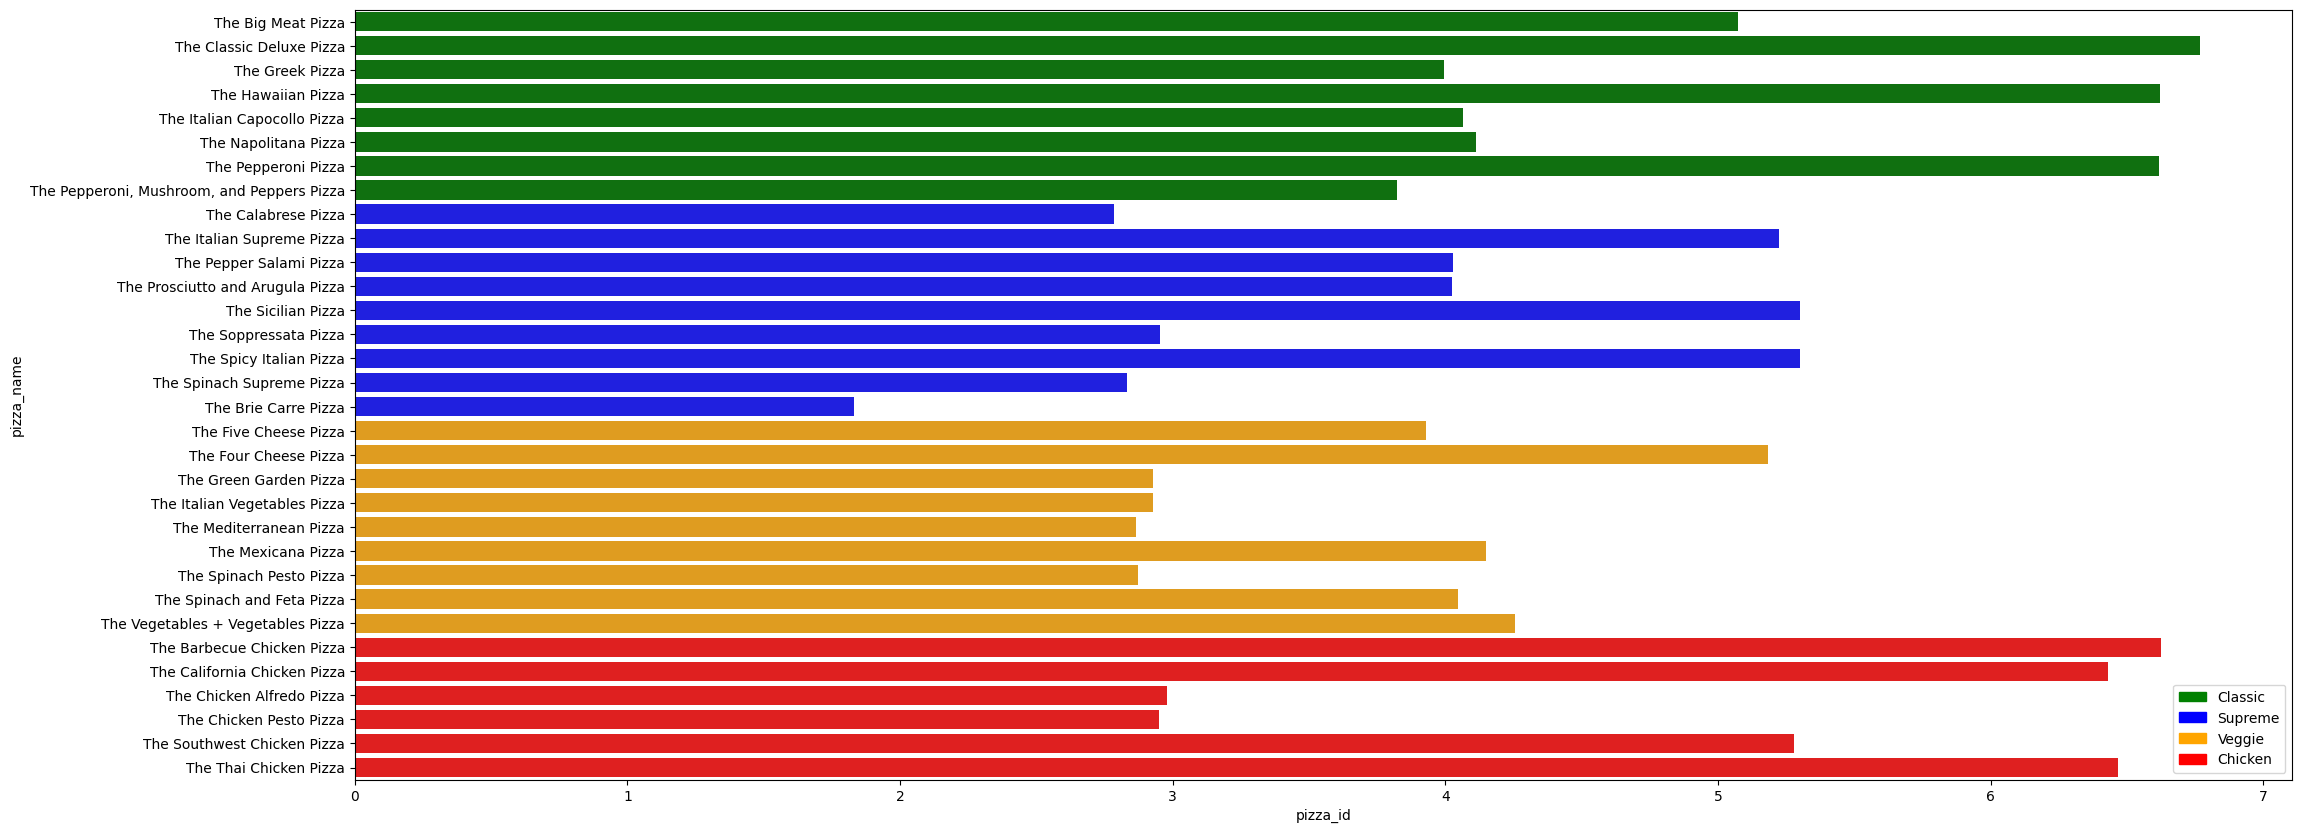

In [ ]:
#Kategori pizza dari masing-masing produk pizza
fig = plt.subplots(figsize=(25,10))
x = df.groupby(['order_date','pizza_name','pizza_category'])['pizza_id'].count().reset_index()

cat_classic = x[x['pizza_category'] == 'Classic']
bar_1 = sns.barplot(x='pizza_id', y='pizza_name', data=cat_classic, color='green', errorbar=None)
cat_supreme = x[x['pizza_category'] == 'Supreme']
bar_2 = sns.barplot(x='pizza_id', y='pizza_name', data=cat_supreme, color='blue', errorbar=None)
cat_veggie = x[x['pizza_category'] == 'Veggie']
bar_3 = sns.barplot(x='pizza_id', y='pizza_name', data=cat_veggie, color='orange', errorbar=None)
cat_chicken = x[x['pizza_category'] == 'Chicken']
bar_4 = sns.barplot(x='pizza_id', y='pizza_name', data=cat_chicken, color='red', errorbar=None)

#Menambahkan legend
cat_class = mpatches.Patch(color='green', label='Classic')
cat_supre = mpatches.Patch(color='blue', label='Supreme')
cat_veg = mpatches.Patch(color='orange', label='Veggie')
cat_chic = mpatches.Patch(color='red', label='Chicken')
plt.legend(handles=[cat_class, cat_supre, cat_veg, cat_chic])

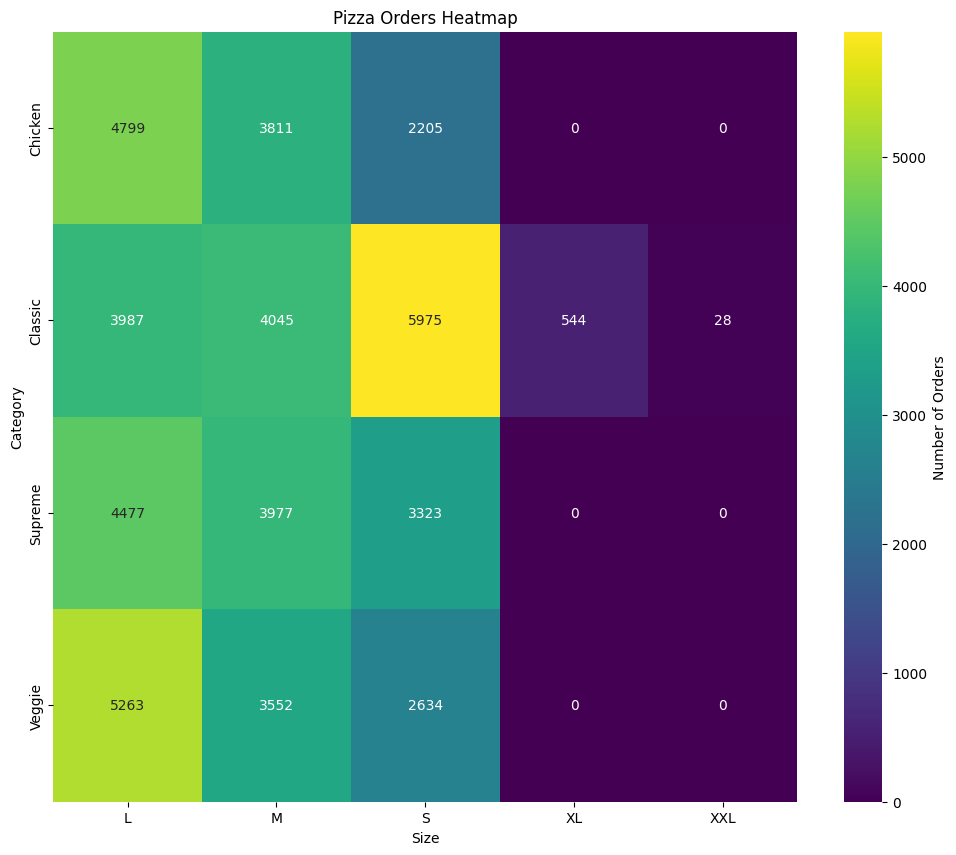

In [ ]:
x = df.groupby(['pizza_size', 'pizza_category'])['pizza_id'].count().reset_index()
new_x = x.pivot(index='pizza_category', columns='pizza_size', values='pizza_id').fillna(0).astype('int')

plt.figure(figsize=(12, 10))
sns.heatmap(new_x, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Number of Orders'})

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Category')
plt.title('Pizza Orders Heatmap')

# Show the plot
plt.show()

In [ ]:
x = df.groupby(['pizza_size', 'pizza_category', 'pizza_name','unit_price'])['pizza_id'].count().reset_index()

fig = px.bar(
    x,
    x='pizza_name',
    y='pizza_id',
    color='pizza_size',  # You can choose to color by 'pizza_category' or another variable
    title="Pizza Sales Count by Size and Category",
    labels={'count': 'Sales Count', 'pizza_name': 'Pizza Name'},
    hover_data=['pizza_category', 'unit_price']  # Additional data on hover
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate labels if needed
fig.show()

# -> Kategori Chicken memiliki harga yang sama di setiap produk pizza dan harganya berbeda sesuai ukuran pizzanya
# -> Kategori lainnya memiliki harga yang bervariasi antar produk dan antar ukuran pizza

In [ ]:
'''
- Pizza yang sering dibeli pada kategori Classic adalah The Classic Deluxe Pizza, The Hawaiian Pizza, dan The Pepperoni Pizza
- Pizza yang sering dibeli pada kategori Supreme adalah The Sicilian Pizza, The Spicy Italian
- Pizza yang sering dibeli pada kategori Veggie adalah The Four Cheese Pizza
- Pizza yang sering dibeli pada kategori Chicken adalah The Barbeque Chicken
- Ukuran pizza yang sering dibeli pada kategori Classic adalah S
- Ukuran pizza yang sering dibeli pada kategori Chicken adalah L
- Ukuran pizza yang sering dibeli pada kategori Supreme adalah L
- Ukuran pizza yang sering dibeli pada kategori Veggie adalah L
'''

'\n- Pizza yang sering dibeli pada kategori Classic adalah The Classic Deluxe Pizza, The Hawaiian Pizza, dan The Pepperoni Pizza\n- Pizza yang sering dibeli pada kategori Supreme adalah The Sicilian Pizza, The Spicy Italian\n- Pizza yang sering dibeli pada kategori Veggie adalah The Four Cheese Pizza\n- Pizza yang sering dibeli pada kategori Chicken adalah The Barbeque Chicken\n- Ukuran pizza yang sering dibeli pada kategori Classic adalah S\n- Ukuran pizza yang sering dibeli pada kategori Chicken adalah L\n- Ukuran pizza yang sering dibeli pada kategori Supreme adalah L\n- Ukuran pizza yang sering dibeli pada kategori Veggie adalah L\n'

###Harian

Text(0, 0.5, 'Income')

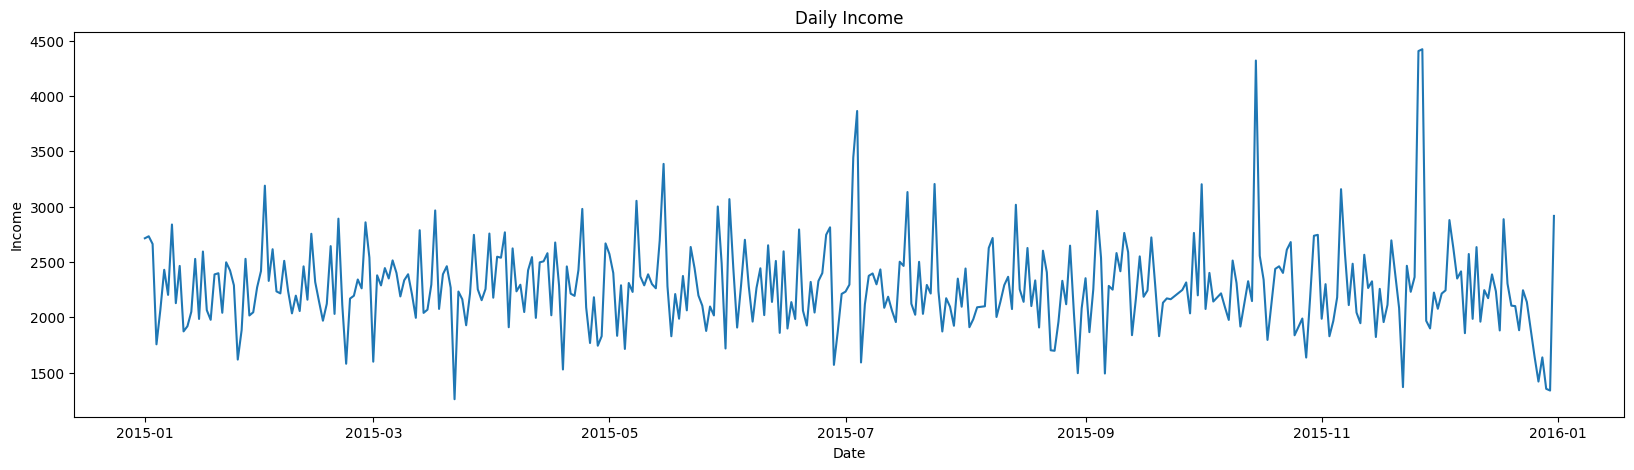

In [ ]:
#Total pendapatan harian
x = df.groupby('order_date')['total_price'].sum().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x='order_date', y='total_price')
plt.title('Daily Income')
plt.xlabel('Date')
plt.ylabel('Income')

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,week,formatted_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,11:00
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,11:00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,11:00
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,11:00
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,11:00


In [ ]:
#Produk pizza apa yang dibeli setiap harinya?
daily_pizza = df.groupby(['order_date', 'pizza_name'])['pizza_id'].count().reset_index()

fig = px.scatter(daily_pizza, x='order_date', y='pizza_id', color='pizza_name',
                 labels={'week': 'Week', 'pizza_name_id': 'Number of Orders', 'pizza_name': 'Pizza Name'},
                 title='Daily Pizza',
                 color_continuous_scale='Viridis',  # Choose a color scale
                 size='pizza_id',  # Size of markers based on count
                 size_max=20)  # Maximum size for markers

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Daily',
    yaxis_title='Number of Orders',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    legend_title='Pizza Name',
    legend=dict(x=1.05, y=1)  # Adjust legend position
)

# Show the plot
fig.show()

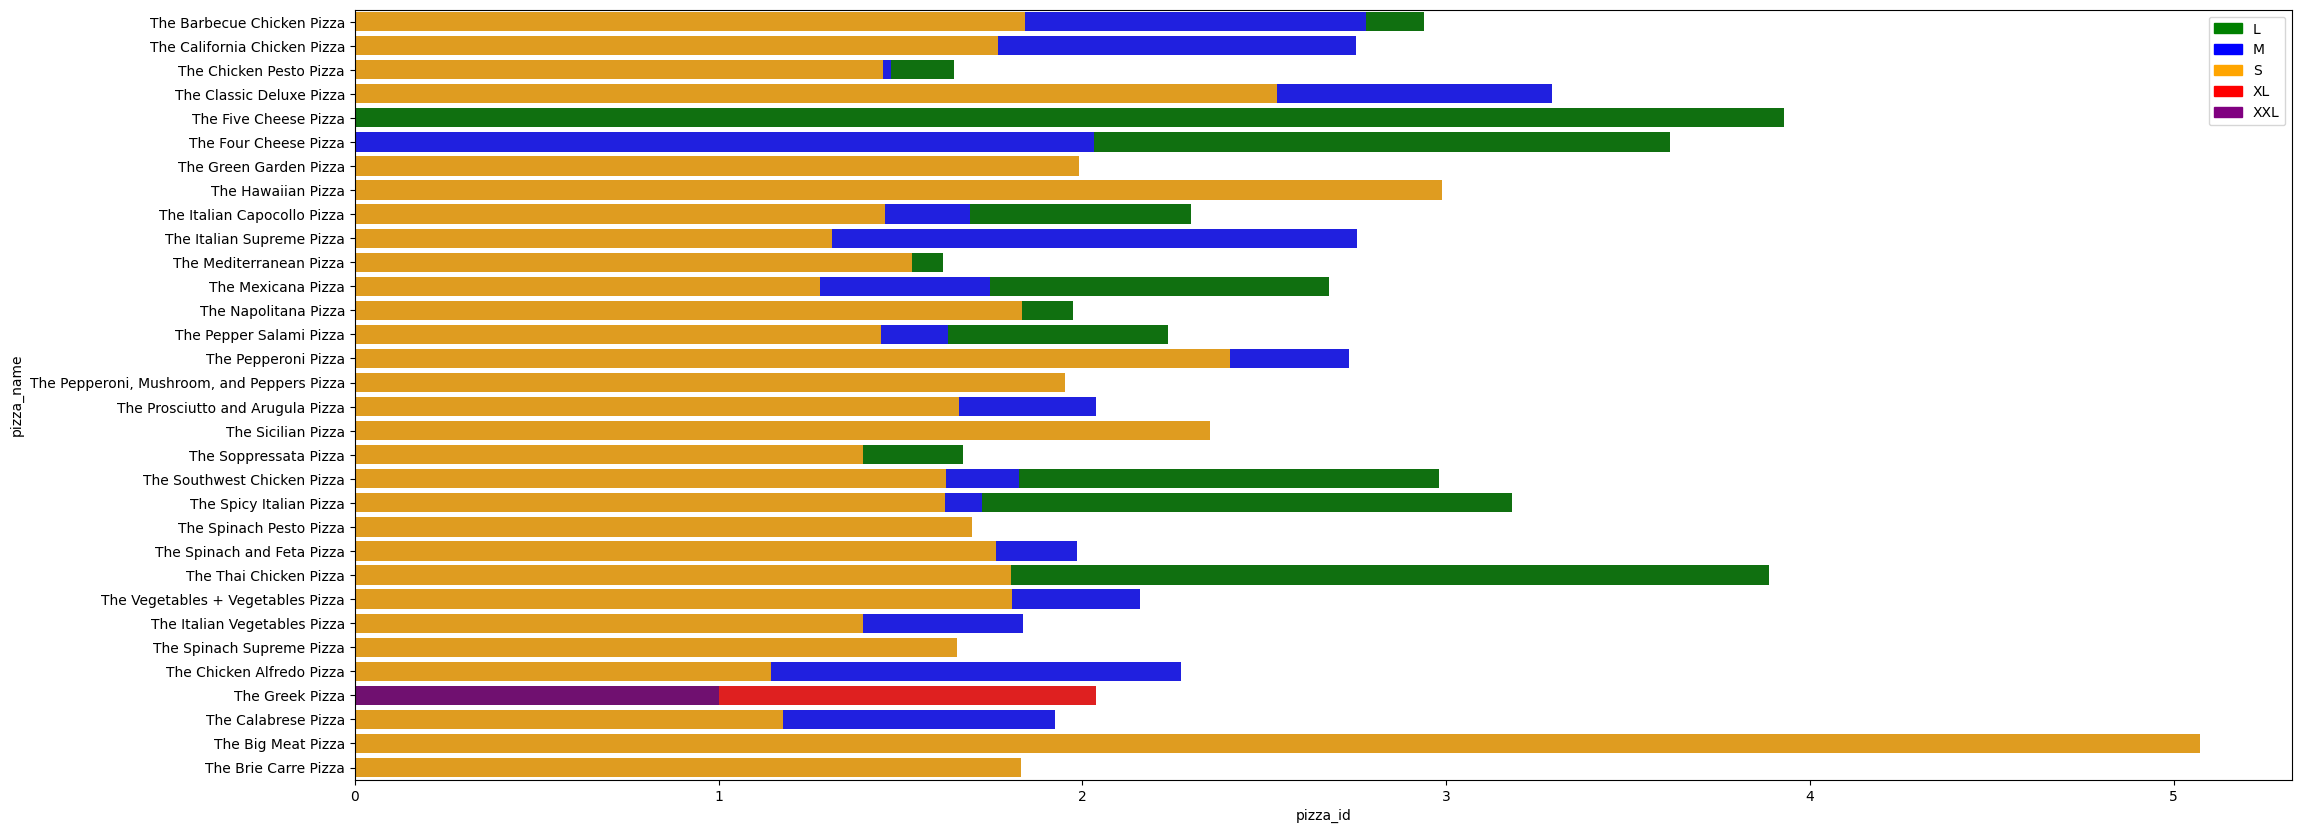

In [ ]:
#Ukuran pizza apa dibeli setiap harinya?
fig = plt.subplots(figsize=(25,10))
x = df.groupby(['order_date','pizza_name','pizza_size'])['pizza_id'].count().reset_index()
size_l = x[x['pizza_size'] == 'L']
bar_1 = sns.barplot(x='pizza_id', y='pizza_name', data=size_l, color='green', errorbar=None)
size_m = x[x['pizza_size'] == 'M']
bar_2 = sns.barplot(x='pizza_id', y='pizza_name', data=size_m, color='blue', errorbar=None)
size_s = x[x['pizza_size'] == 'S']
bar_3 = sns.barplot(x='pizza_id', y='pizza_name', data=size_s, color='orange', errorbar=None)
size_xl = x[x['pizza_size'] == 'XL']
bar_4 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xl, color='red', errorbar=None)
size_xxl = x[x['pizza_size'] == 'XXL']
bar_5 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xxl, color='purple', errorbar = None)

#Menambahkan legend
ukuran_l = mpatches.Patch(color='green', label='L')
ukuran_m = mpatches.Patch(color='blue', label='M')
ukuran_s = mpatches.Patch(color='orange', label='S')
ukuran_xl = mpatches.Patch(color='red', label='XL')
ukuran_xxl = mpatches.Patch(color='purple', label='XXL')
plt.legend(handles=[ukuran_l, ukuran_m, ukuran_s, ukuran_xl, ukuran_xxl])
plt.show()

<ipython-input-29-da5f96002be5>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




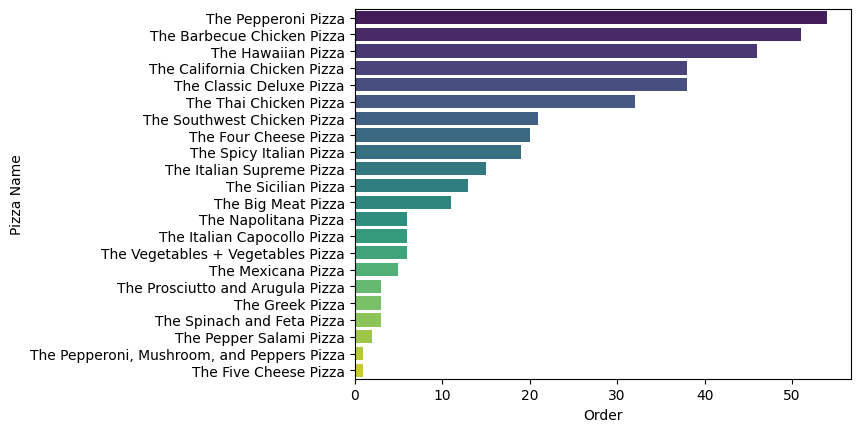

In [ ]:
#Pizza apa yang jumlah ordernya paling banyak dalam satu hari?
x = df.groupby(['order_date', 'pizza_name'])['pizza_id'].count().reset_index().sort_values(by=['order_date', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['order_date'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] == 1]
y = count_pizza.groupby('pizza_name')['order_date'].count().reset_index().sort_values(by='order_date', ascending=False)

sns.barplot(data=y, x=y['order_date'], y=y['pizza_name'], palette='viridis')
plt.xlabel('Order')
plt.ylabel('Pizza Name')
plt.show()

<ipython-input-30-4f7084563031>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




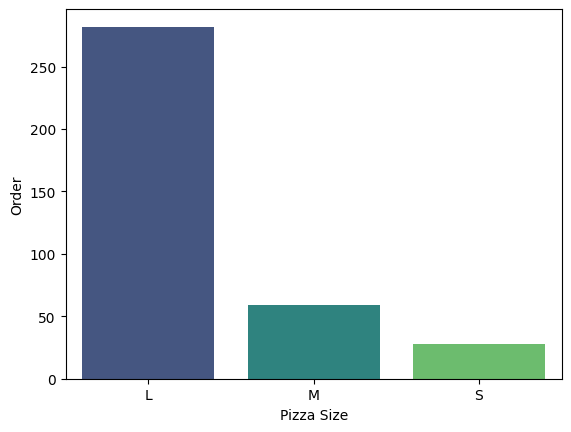

In [ ]:
#Ukuran pizza yang jumlah ordernya paling banyak dalam satu hari?
x = df.groupby(['order_date', 'pizza_size'])['pizza_id'].count().reset_index().sort_values(by=['order_date', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['order_date'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] == 1]
y = count_pizza.groupby('pizza_size')['order_date'].count().reset_index().sort_values(by='order_date', ascending=False)

sns.barplot(data=y, x=y['pizza_size'], y=y['order_date'], palette='viridis')
plt.xlabel('Pizza Size')
plt.ylabel('Order')
plt.show()


<Axes: ylabel='pizza_name'>

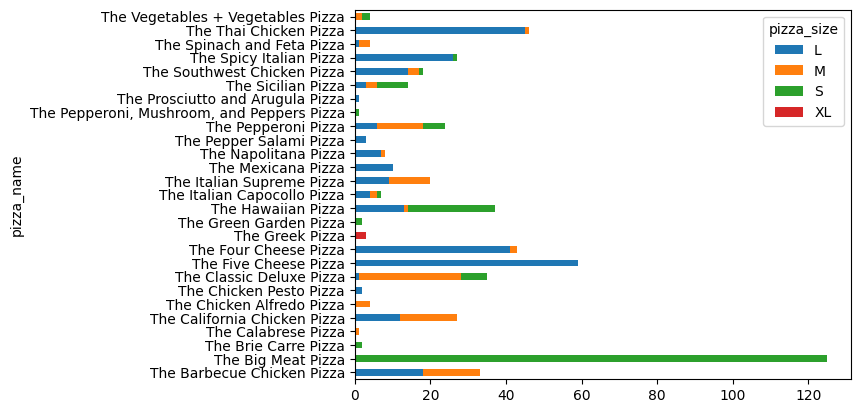

In [ ]:
#Ukuran pizza apa yang sering dibeli secara harian dan produk pizza apa? (The Brie Carre Pizza -> L)
x = df.groupby(['order_date', 'pizza_name', 'pizza_size'])['pizza_id'].count().reset_index()
x['rank'] = x.groupby('order_date')['pizza_id'].rank(method='dense', ascending=False).astype('int')
new_x = x[x['rank'] == 1][['order_date','pizza_name','pizza_size']]
y = new_x.groupby(['pizza_name', 'pizza_size'])['order_date'].count().reset_index()

y_pivot = y.pivot(index='pizza_name', columns='pizza_size', values='order_date').fillna(0).astype('int') #Visualisasi
y_pivot.plot(kind='barh',stacked=True)

###Mingguan

Text(0, 0.5, 'Income')

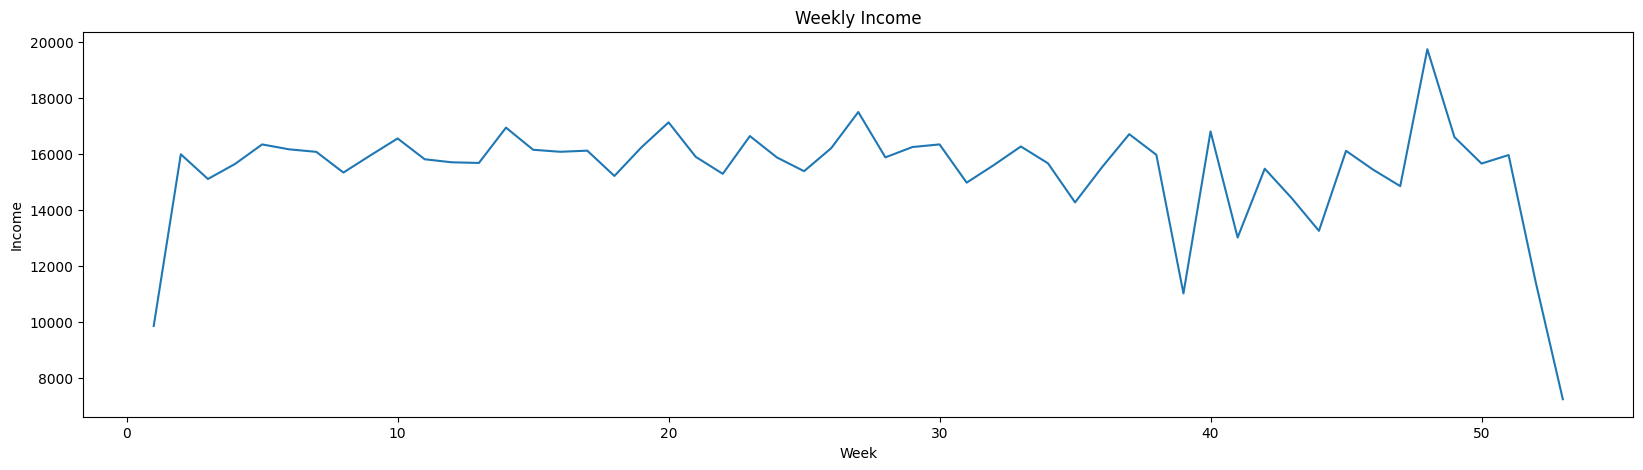

In [ ]:
#Total pendapatan mingguan
x = df.groupby('week')['total_price'].sum().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x='week', y='total_price')
plt.title('Weekly Income')
plt.xlabel('Week')
plt.ylabel('Income')

In [ ]:
#Produk pizza apa yang dibeli setiap minggunya?
weekly_pizza = df.groupby(['week', 'pizza_name'])['pizza_id'].count().reset_index()

fig = px.scatter(weekly_pizza, x='week', y='pizza_id', color='pizza_name',
                 labels={'week': 'Week', 'pizza_name_id': 'Number of Orders', 'pizza_name': 'Pizza Name'},
                 title='Weekly Pizza',
                 color_continuous_scale='Viridis',  # Choose a color scale
                 size='pizza_id',  # Size of markers based on count
                 size_max=20)  # Maximum size for markers

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Weekly',
    yaxis_title='Number of Orders',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    legend_title='Pizza Name',
    legend=dict(x=1.05, y=1)  # Adjust legend position
)

# Show the plot
fig.show()

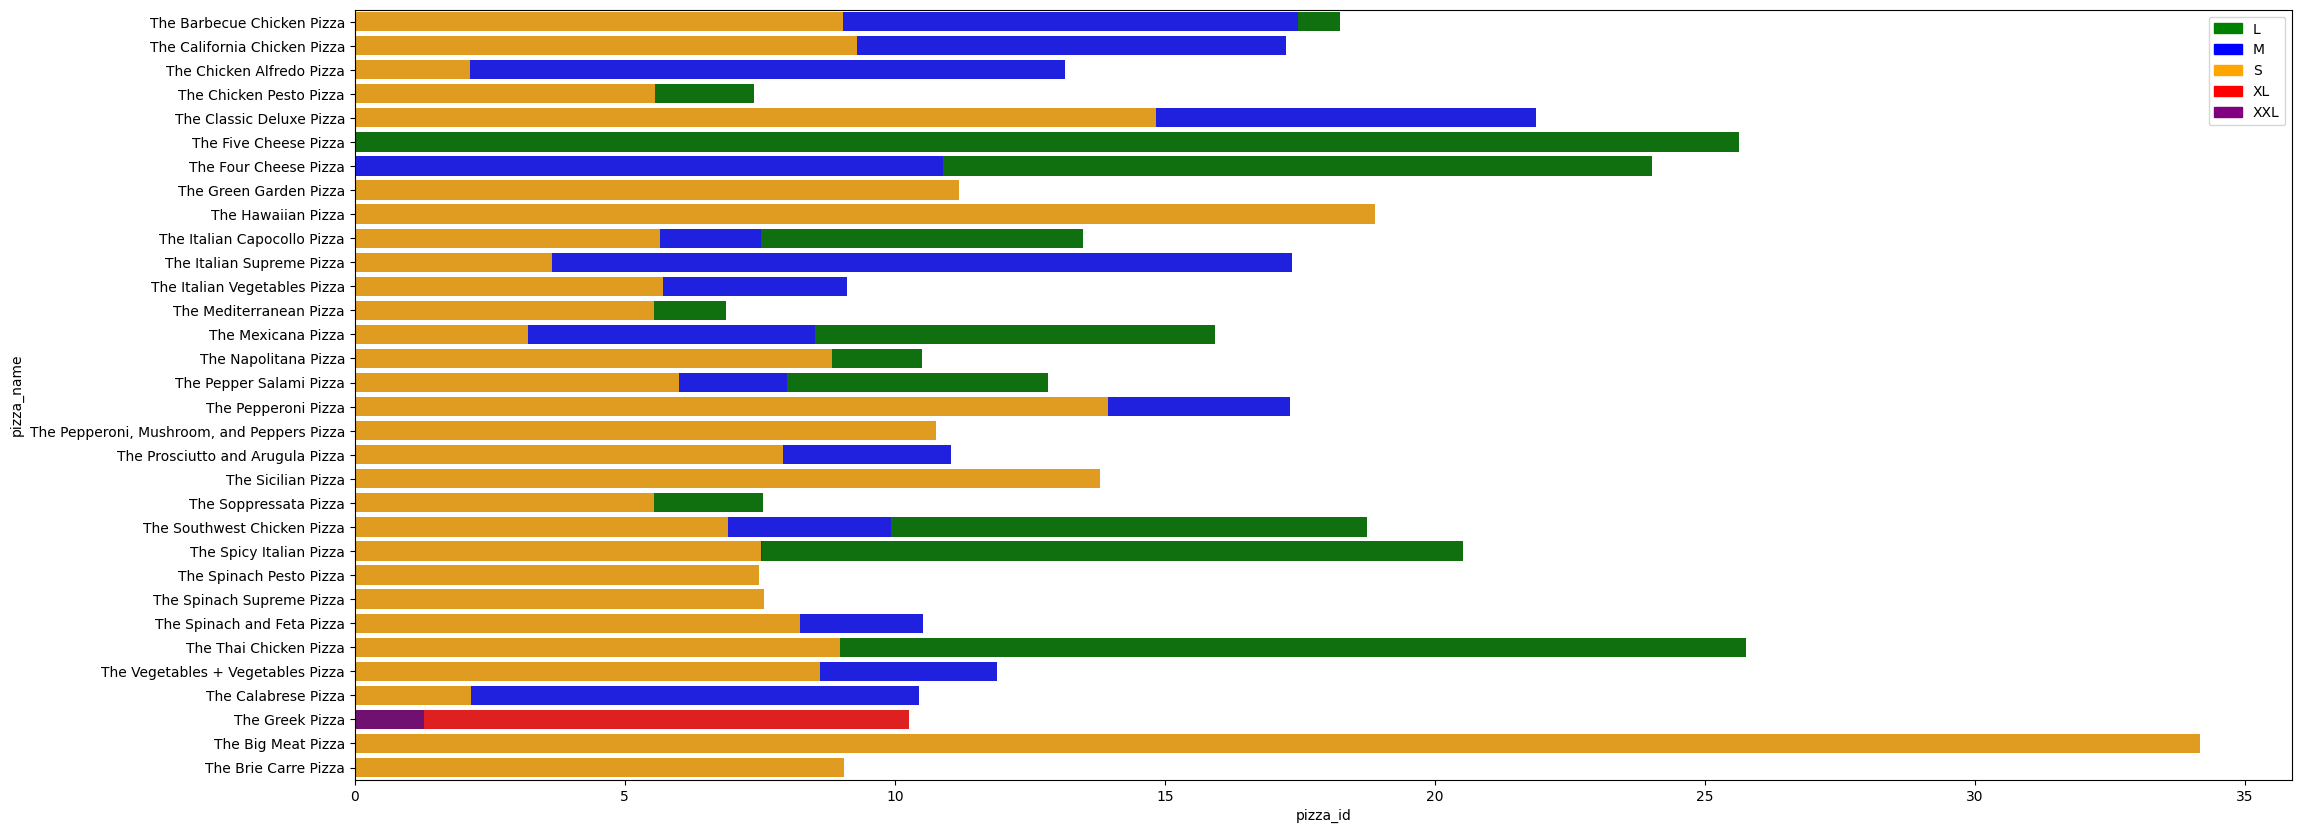

In [ ]:
#Ukuran pizza apa yang dibeli setiap minggunya?
fig = plt.subplots(figsize=(25,10))
weekly_pizza = df.groupby(['week', 'pizza_name', 'pizza_size'])['pizza_id'].count().reset_index()
size_l = weekly_pizza[weekly_pizza['pizza_size'] == 'L']
bar_1 = sns.barplot(x='pizza_id', y='pizza_name', data=size_l, color='green', errorbar=None)
size_m = weekly_pizza[weekly_pizza['pizza_size'] == 'M']
bar_2 = sns.barplot(x='pizza_id', y='pizza_name', data=size_m, color='blue', errorbar=None)
size_s = weekly_pizza[weekly_pizza['pizza_size'] == 'S']
bar_3 = sns.barplot(x='pizza_id', y='pizza_name', data=size_s, color='orange', errorbar=None)
size_xl = weekly_pizza[weekly_pizza['pizza_size'] == 'XL']
bar_4 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xl, color='red', errorbar=None)
size_xxl = weekly_pizza[weekly_pizza['pizza_size'] == 'XXL']
bar_5 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xxl, color='purple', errorbar = None)

#Menambahkan legend
ukuran_l = mpatches.Patch(color='green', label='L')
ukuran_m = mpatches.Patch(color='blue', label='M')
ukuran_s = mpatches.Patch(color='orange', label='S')
ukuran_xl = mpatches.Patch(color='red', label='XL')
ukuran_xxl = mpatches.Patch(color='purple', label='XXL')
plt.legend(handles=[ukuran_l, ukuran_m, ukuran_s, ukuran_xl, ukuran_xxl])
plt.show()

<ipython-input-35-e95e4d5afd88>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




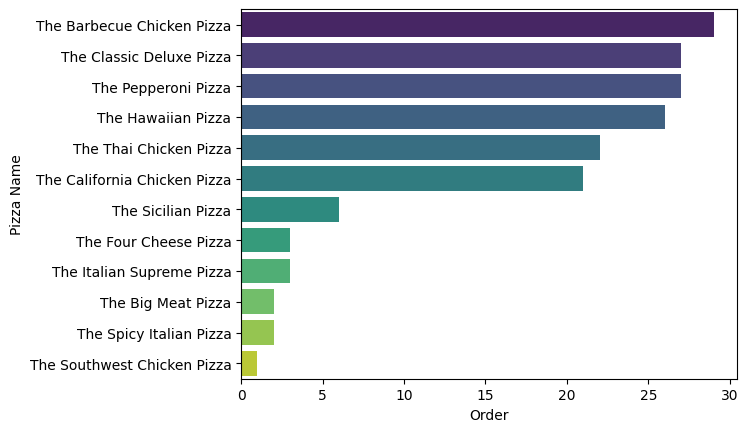

In [ ]:
#Pizza apa yang jumlah ordernya paling banyak dalam satu minggu?
x = df.groupby(['week', 'pizza_name'])['pizza_id'].count().reset_index().sort_values(by=['week', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['week'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] <= 3]
y = count_pizza.groupby('pizza_name')['week'].count().reset_index().sort_values(by='week', ascending=False)

sns.barplot(data=y, x=y['week'], y=y['pizza_name'], palette='viridis')
plt.xlabel('Order')
plt.ylabel('Pizza Name')
plt.show()

<ipython-input-36-63a308998713>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




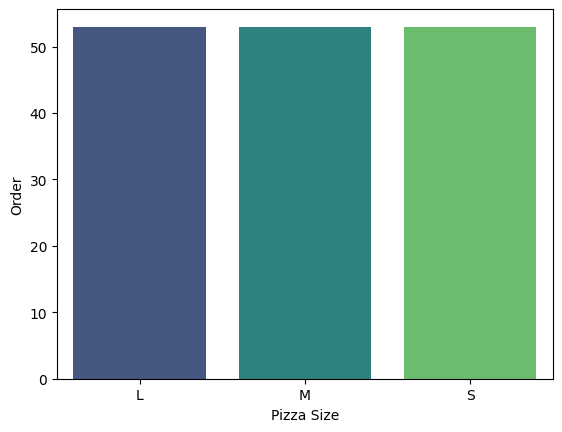

In [ ]:
#Ukuran pizza yang jumlah ordernya paling banyak dalam satu minggu?
x = df.groupby(['week', 'pizza_size'])['pizza_id'].count().reset_index().sort_values(by=['week', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['week'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] <= 3]
y = count_pizza.groupby('pizza_size')['week'].count().reset_index().sort_values(by='week', ascending=False)

sns.barplot(data=y, x=y['pizza_size'], y=y['week'], palette='viridis')
plt.xlabel('Pizza Size')
plt.ylabel('Order')
plt.show()

<Axes: ylabel='pizza_name'>

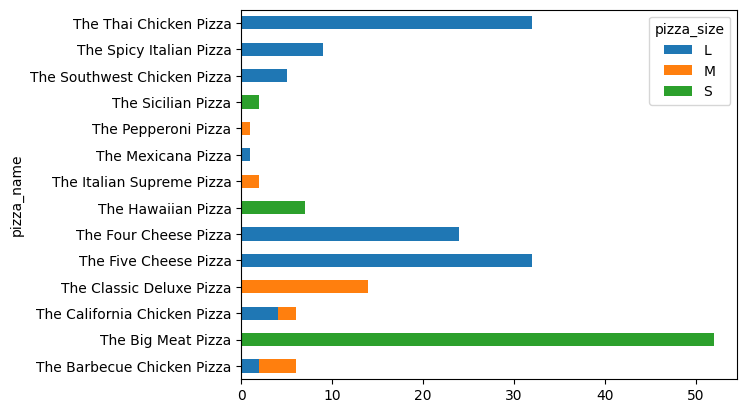

In [ ]:
#Ukuran pizza apa yang sering dibeli dan produk pizza apa? (The Greek Pizza -> L)
x = df.groupby(['week', 'pizza_name', 'pizza_size'])['pizza_id'].count().reset_index()
x['rank'] = x.groupby('week')['pizza_id'].rank(method='dense', ascending=False).astype('int')
new_x = x[x['rank'] <= 3][['week','pizza_name','pizza_size']]
y = new_x.groupby(['pizza_name', 'pizza_size'])['week'].count().reset_index()

y_pivot = y.pivot(index='pizza_name', columns='pizza_size', values='week').fillna(0).astype('int') #Visualisasi
y_pivot.plot(kind='barh',stacked=True)

###Bulanan

Text(0, 0.5, 'Income')

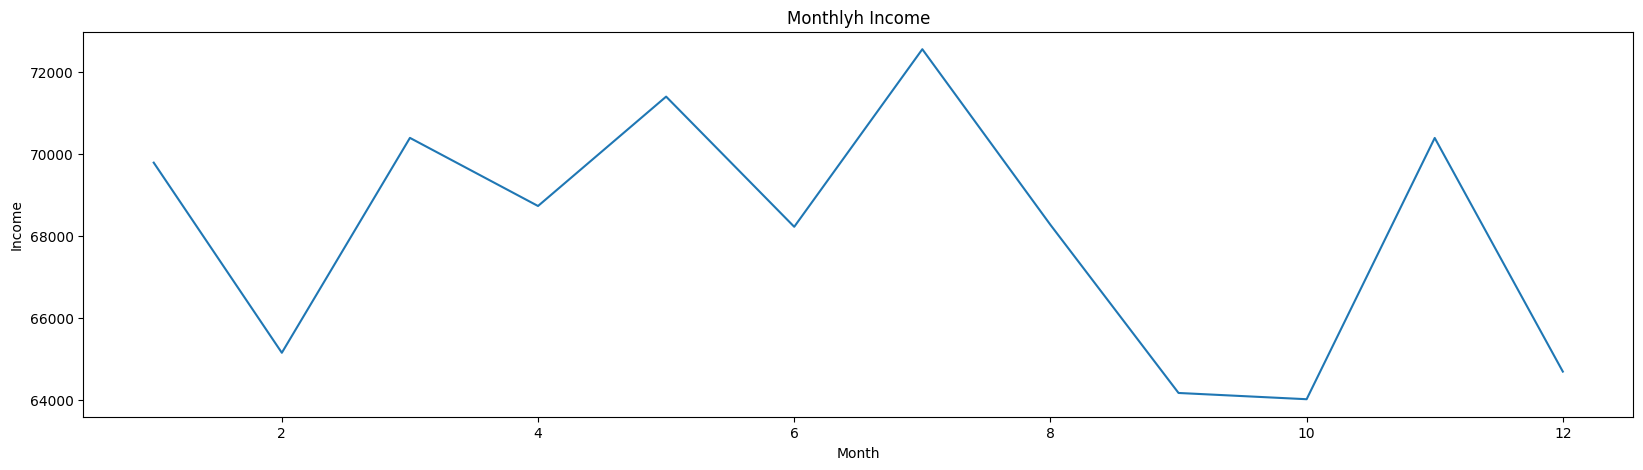

In [ ]:
#Total pendapatan bulanan
x = df.groupby('month')['total_price'].sum().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x='month', y='total_price')
plt.title('Monthlyh Income')
plt.xlabel('Month')
plt.ylabel('Income')

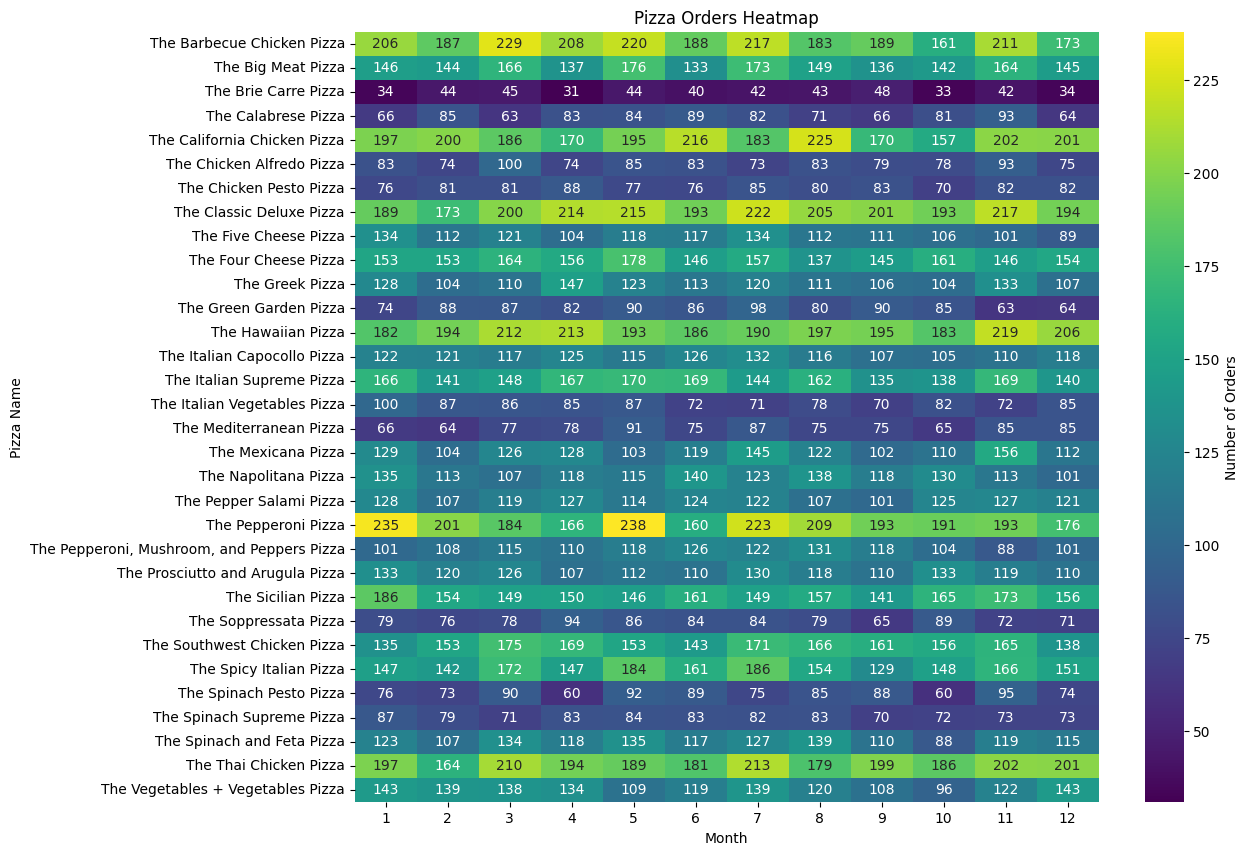

In [ ]:
#Total Pizza yang dibeli dalam bulanan
x = df.groupby(['month','pizza_name'])['pizza_name_id'].count().reset_index()
# Pivot the data to have months as columns and pizza names as rows
pivot_df = x.pivot(index='pizza_name', columns='month', values='pizza_name_id')

# Fill NaN values with 0 if no data is available for a specific combination
pivot_df = pivot_df.fillna(0)

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(pivot_df, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Number of Orders'})

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Pizza Name')
plt.title('Pizza Orders Heatmap')

# Show the plot
plt.show()

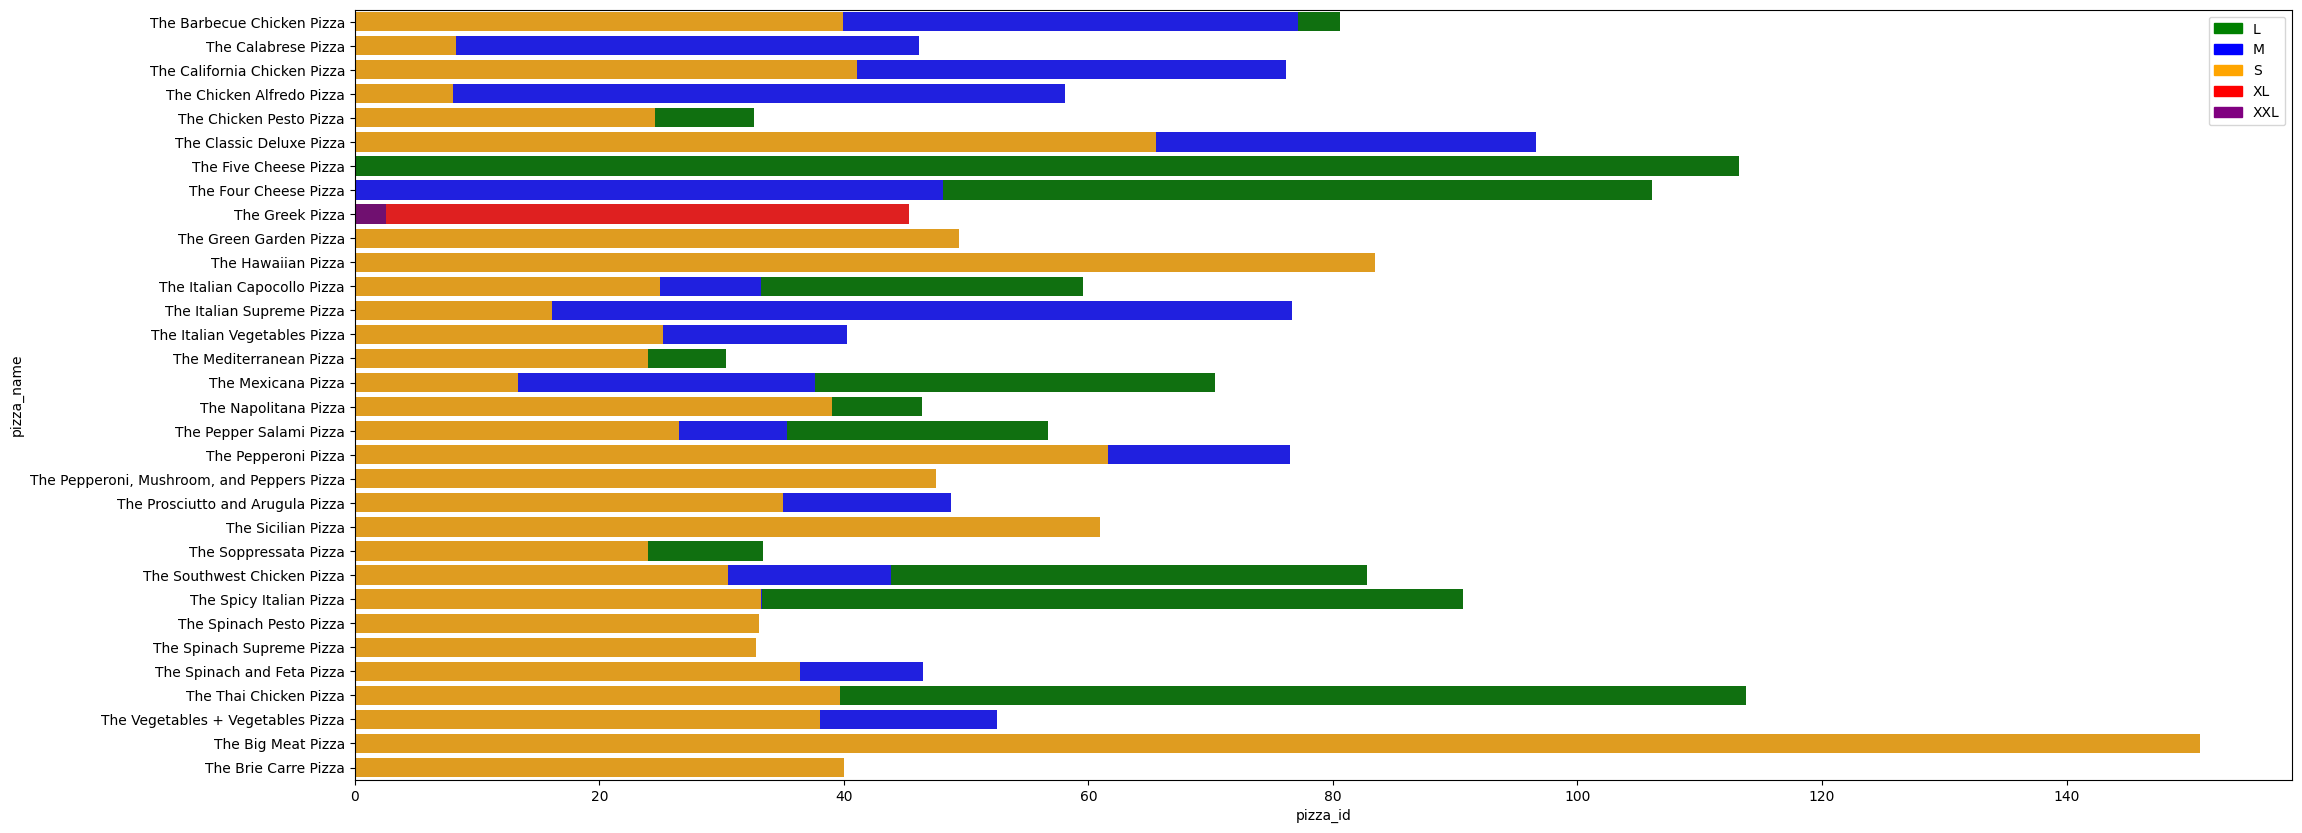

In [ ]:
#Ukuran pizza apa yang sering dibeli setiap harinya?
fig = plt.subplots(figsize=(25,10))
monthly_pizza = df.groupby(['month', 'pizza_name', 'pizza_size'])['pizza_id'].count().reset_index()
size_l = monthly_pizza[monthly_pizza['pizza_size'] == 'L']
bar_1 = sns.barplot(x='pizza_id', y='pizza_name', data=size_l, color='green', errorbar=None)
size_m = monthly_pizza[monthly_pizza['pizza_size'] == 'M']
bar_2 = sns.barplot(x='pizza_id', y='pizza_name', data=size_m, color='blue', errorbar=None)
size_s = monthly_pizza[monthly_pizza['pizza_size'] == 'S']
bar_3 = sns.barplot(x='pizza_id', y='pizza_name', data=size_s, color='orange', errorbar=None)
size_xl = monthly_pizza[monthly_pizza['pizza_size'] == 'XL']
bar_4 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xl, color='red', errorbar=None)
size_xxl = monthly_pizza[monthly_pizza['pizza_size'] == 'XXL']
bar_5 = sns.barplot(x='pizza_id', y='pizza_name', data=size_xxl, color='purple', errorbar = None)

#Menambahkan legend
ukuran_l = mpatches.Patch(color='green', label='L')
ukuran_m = mpatches.Patch(color='blue', label='M')
ukuran_s = mpatches.Patch(color='orange', label='S')
ukuran_xl = mpatches.Patch(color='red', label='XL')
ukuran_xxl = mpatches.Patch(color='purple', label='XXL')
plt.legend(handles=[ukuran_l, ukuran_m, ukuran_s, ukuran_xl, ukuran_xxl])
plt.show()

<ipython-input-41-874561447f76>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




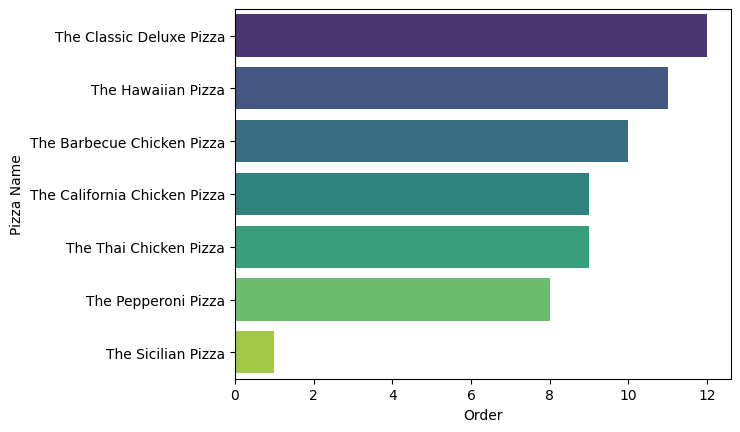

In [ ]:
#Pizza apa yang jumlah ordernya paling banyak dalam satu bulan?
x = df.groupby(['month', 'pizza_name'])['pizza_id'].count().reset_index().sort_values(by=['month', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['month'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] <= 5]
y = count_pizza.groupby('pizza_name')['month'].count().reset_index().sort_values(by='month', ascending=False)

sns.barplot(data=y, x=y['month'], y=y['pizza_name'], palette='viridis')
plt.xlabel('Order')
plt.ylabel('Pizza Name')
plt.show()

<ipython-input-42-a56c976b578c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




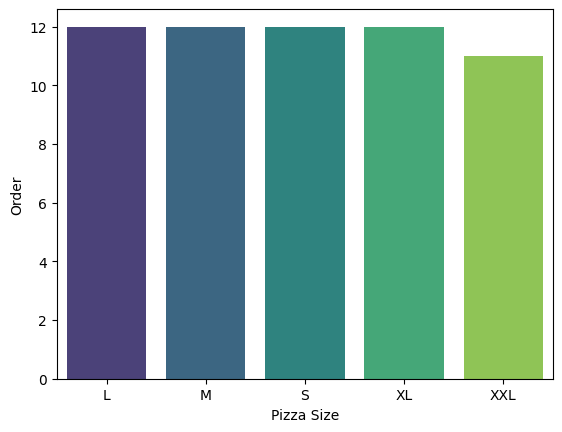

In [ ]:
#Ukuran pizza yang jumlah ordernya paling banyak dalam satu bulan?
x = df.groupby(['month', 'pizza_size'])['pizza_id'].count().reset_index().sort_values(by=['month', 'pizza_id'], ascending=[True, False])
x['rank'] = x.groupby(['month'])['pizza_id'].rank(ascending=False).astype('int')
count_pizza = x[x['rank'] <= 5]
y = count_pizza.groupby('pizza_size')['month'].count().reset_index().sort_values(by='month', ascending=False)

sns.barplot(data=y, x=y['pizza_size'], y=y['month'], palette='viridis')
plt.xlabel('Pizza Size')
plt.ylabel('Order')
plt.show()

<Axes: ylabel='pizza_name'>

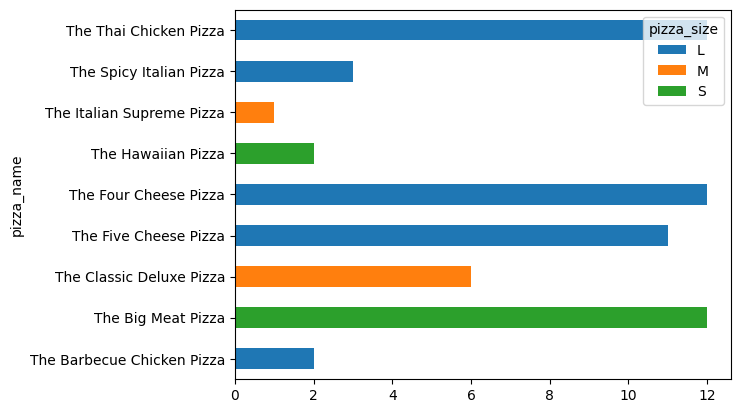

In [ ]:
#Ukuran pizza apa yang sering dibeli dan produk pizza apa? (The Greek Pizza -> L)
x = df.groupby(['month', 'pizza_name', 'pizza_size'])['pizza_id'].count().reset_index()
x['rank'] = x.groupby('month')['pizza_id'].rank(method='dense', ascending=False).astype('int')
new_x = x[x['rank'] <= 5][['month','pizza_name','pizza_size']]
y = new_x.groupby(['pizza_name', 'pizza_size'])['month'].count().reset_index()

y_pivot = y.pivot(index='pizza_name', columns='pizza_size', values='month').fillna(0).astype('int') #Visualisasi
y_pivot.plot(kind='barh',stacked=True)

###Question

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,week,formatted_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,11:00
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,11:00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,11:00
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,11:00
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,11:00


In [ ]:
#Pizza sering dipesan di jam berapa?
x = df.groupby(['order_date', 'formatted_time'])['pizza_id'].count().reset_index()
new_x = x.groupby('order_date')['pizza_id'].max().reset_index()
y = pd.merge(x, new_x, left_on='order_date', right_on='order_date')
new_y = y[y['pizza_id_x'] == y['pizza_id_y']][['order_date','formatted_time', 'pizza_id_y']]

fig = px.scatter(new_y, x='order_date', y='formatted_time', color='pizza_id_y',
                 labels={'order_date': 'Date', 'formatted_time': 'Time', 'pizza_id_y': 'Num of Order'},
                 title='Pizza Orders by Times',
                 color_continuous_scale='Viridis',
                 hover_name='formatted_time',
                 size='pizza_id_y',
                 size_max=20)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Time',
    xaxis_tickangle=-45,
    legend_title='Pizza Name',
    legend=dict(x=1.05, y=1)
)

# Show the plot
fig.show()

In [ ]:
#Total banyaknya order maksimum di suatu waktu
new_y.groupby('formatted_time')['order_date'].count().reset_index()

,formatted_time,order_date
0,11:00,9
1,12:00,115
2,13:00,98
3,14:00,24
4,15:00,12
5,16:00,25
6,17:00,32
7,18:00,38
8,19:00,20
9,20:00,8


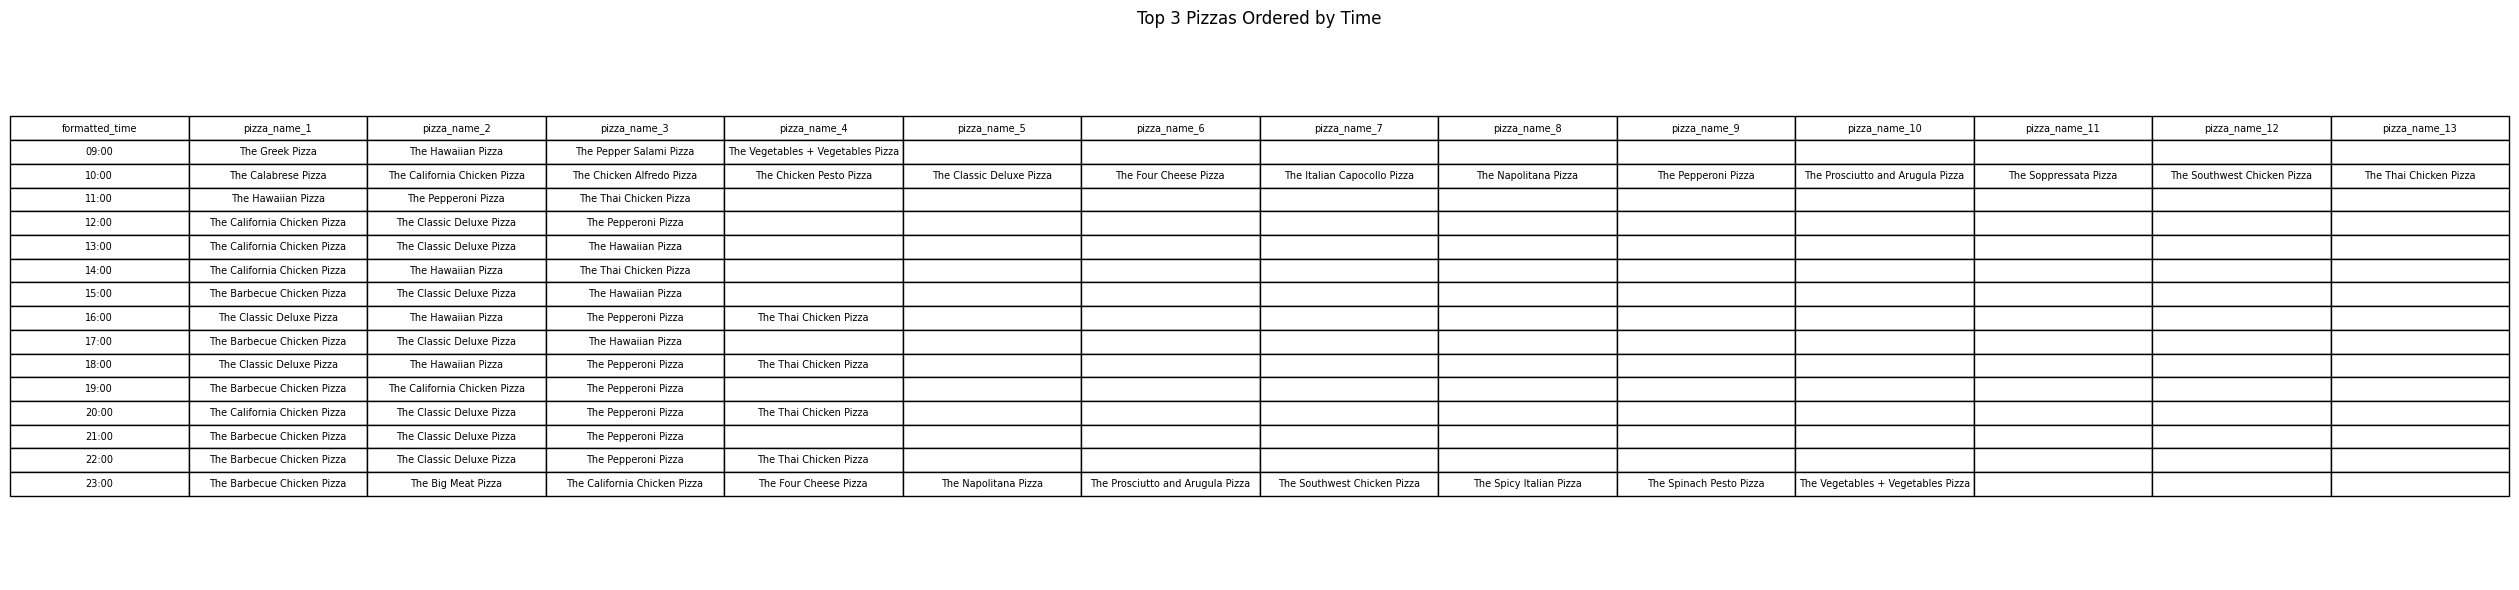

'\nThe Barbeque Chicken Pizza\nThe Classic Deluxe\nThe Pepperoni Pizza\nThe Californian Chicken Pizza\nThe Thai Chicken Pizza\nThe Hawaiian Pizza\n'

In [ ]:
#Pizza apa yang sering dipesan dari jam buka hingga jam tutup? (Top 3)
x = df.groupby(['formatted_time', 'pizza_name'])['pizza_id'].count().reset_index()
x['rank'] = x.groupby('formatted_time')['pizza_id'].rank(method='dense',ascending=False).astype('int')
new_x = x[x['rank'] <= 3]
y = new_x.groupby('formatted_time')['pizza_name'].agg(lambda x: ', '.join(x.astype(str))).reset_index()

# Split the 'pizza_name' column by commas and expand into new columns
pizza_names_split = y['pizza_name'].str.split(', ', expand=True)

# Concatenate the split columns back to the original DataFrame
y = pd.concat([y.drop(columns=['pizza_name']), pizza_names_split], axis=1)

# Optional: Rename columns
y.columns = ['formatted_time'] + [f'pizza_name_{i+1}' for i in range(pizza_names_split.shape[1])]

fig, ax = plt.subplots(figsize=(25, 6))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=y.values, colLabels=y.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.2, 1.2)  # Scale table to make it more readable

plt.title('Top 3 Pizzas Ordered by Time')

plt.tight_layout()
plt.show()

'''
The Barbeque Chicken Pizza
The Classic Deluxe
The Pepperoni Pizza
The Californian Chicken Pizza
The Thai Chicken Pizza
The Hawaiian Pizza
'''

In [ ]:
#Nilai maksimum pizza yang dipesan berdasarkan waktu
x = df.groupby(['formatted_time', 'pizza_name'])['pizza_id'].count().reset_index()
x['max_order'] = x.groupby('formatted_time')['pizza_id'].transform('max')
y = x[x['pizza_id'] == x['max_order']][['formatted_time', 'pizza_name', 'pizza_id']]

fig = px.bar(
    y,
    x='formatted_time',
    y='pizza_id',
    color='pizza_name',
    title="Pizza with Maximum Orders by Time",
    labels={'pizza_id': 'Order Count', 'formatted_time': 'Time'},
    hover_data=['pizza_name']
)

# Customize layout
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
#Nilai minimum pizza yang dipesan berdasarkan waktu
x = df.groupby(['formatted_time', 'pizza_name'])['pizza_id'].count().reset_index()
x['max_order'] = x.groupby('formatted_time')['pizza_id'].transform('max')
x['min_order'] = x.groupby('formatted_time')['pizza_id'].transform('min')
y = x[(x['pizza_id'] == x['min_order']) & (x['min_order'] != x['max_order'])][['formatted_time', 'pizza_name', 'pizza_id']].reset_index(drop=True)

fig = px.bar(
    y,
    x='formatted_time',
    y='pizza_id',
    color='pizza_name',
    title="Pizza with Maximum Orders by Time",
    labels={'pizza_id': 'Order Count', 'formatted_time': 'Time'},
    hover_data=['pizza_name']
)

# Customize layout
fig.update_layout(xaxis_tickangle=-45)
fig.show()

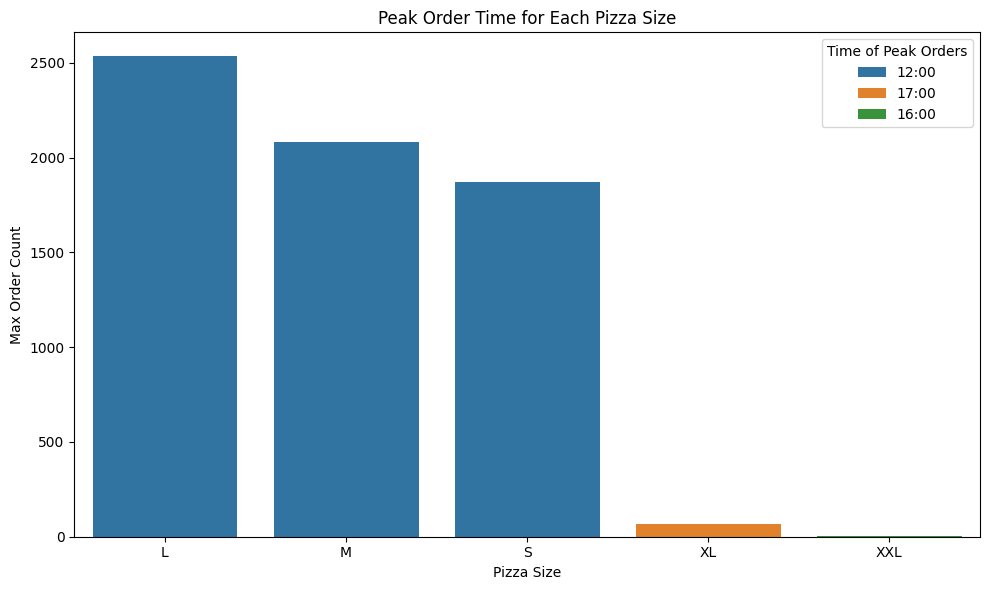

In [ ]:
#Pizza apa yang sering dipesan di jam berapa berdasarkan ukuran pizza?
x = df.groupby(['pizza_size','formatted_time'])['pizza_id'].count().reset_index()
x['max'] = x.groupby(['pizza_size'])['pizza_id'].transform('max')
y = x[x['pizza_id'] == x['max']][['pizza_size', 'formatted_time', 'pizza_id']].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=y, x='pizza_size', y='pizza_id', hue='formatted_time')

plt.title('Peak Order Time for Each Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Max Order Count')
plt.legend(title='Time of Peak Orders', bbox_to_anchor=(1, 1))  # Move legend outside for readability

plt.tight_layout()
plt.show()

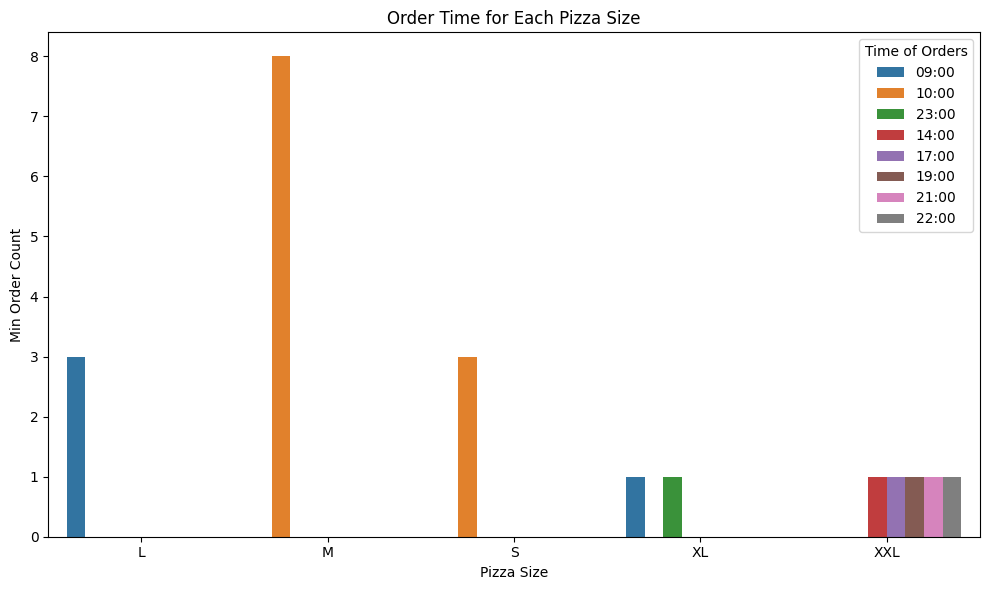

In [ ]:
#Pizza apa yang sering dipesan di jam berapa berdasarkan ukuran pizza?
x = df.groupby(['pizza_size','formatted_time'])['pizza_id'].count().reset_index()
x['max'] = x.groupby(['pizza_size'])['pizza_id'].transform('max')
x['min'] = x.groupby('pizza_size')['pizza_id'].transform('min')
y = x[(x['pizza_id'] == x['min']) & (x['max'] != x['min'])][['pizza_size', 'formatted_time', 'pizza_id']].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=y, x='pizza_size', y='pizza_id', hue='formatted_time')

plt.title('Order Time for Each Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Min Order Count')
plt.legend(title='Time of Orders', bbox_to_anchor=(1, 1))  # Move legend outside for readability

plt.tight_layout()
plt.show()

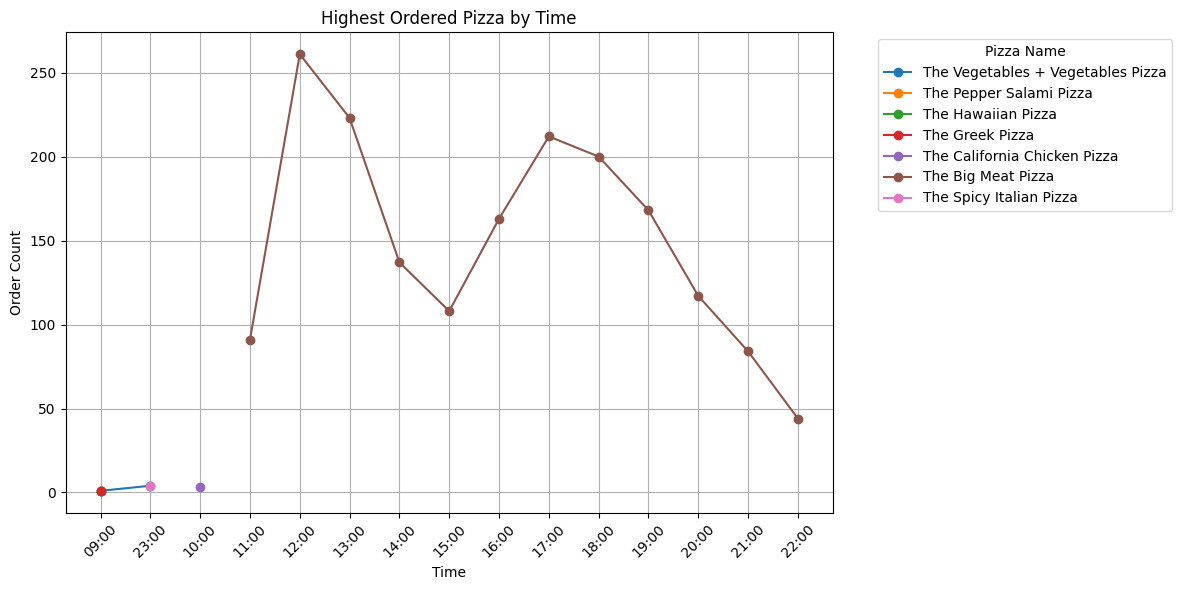

In [ ]:
#Ukuran pizza dan pizza apa yang sering dipesan dari jam buka hingga jam tutup? (The Brie Caree -> L -> 18.00) (Top 3)
x = df.groupby(['pizza_name', 'pizza_size', 'formatted_time'])['pizza_id'].count().reset_index()
x['max'] = x.groupby('formatted_time')['pizza_id'].transform('max')
y = x[x['pizza_id'] == x['max']][['pizza_name', 'pizza_size', 'formatted_time','pizza_id']].sort_values(by=['formatted_time'], ascending=True)

plt.figure(figsize=(12, 6))

for pizza_name in y['pizza_name'].unique():
    subset = y[y['pizza_name'] == pizza_name]
    plt.plot(subset['formatted_time'], subset['pizza_id'], marker='o', label=pizza_name)

plt.title('Highest Ordered Pizza by Time')
plt.xlabel('Time')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.legend(title='Pizza Name', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

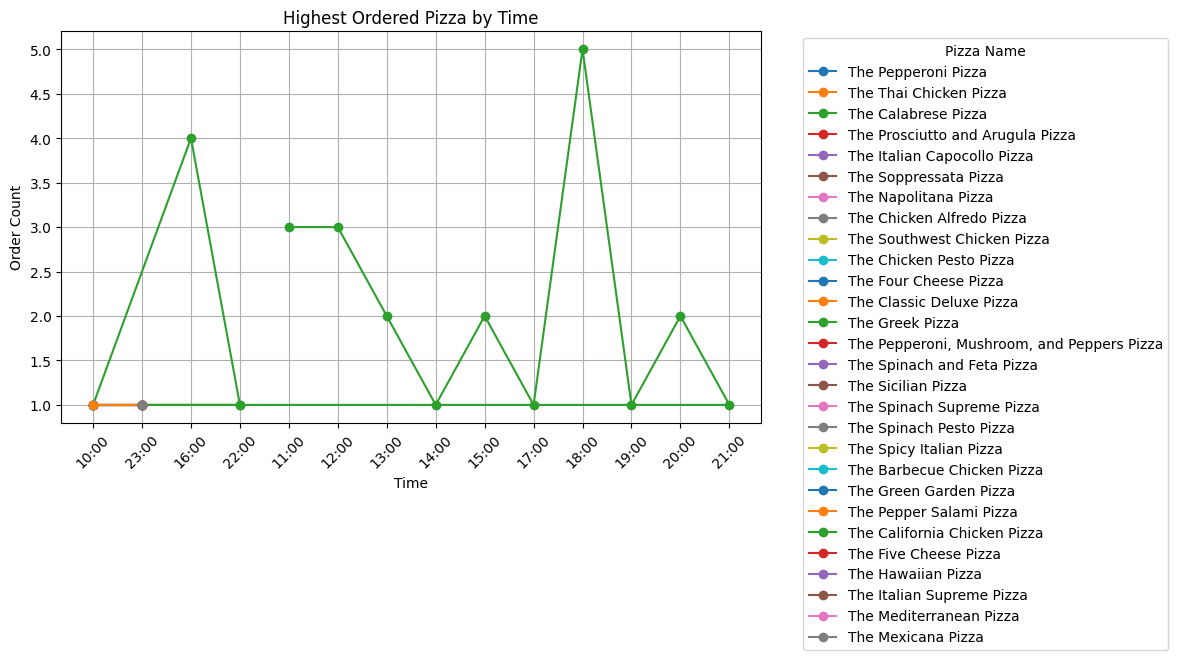

In [ ]:
#Ukuran pizza dan pizza apa yang paling sedikit jumlahnya dipesan dari jam buka hingga jam tutup? (The Brie Caree -> L -> 18.00) (Top 3)
x = df.groupby(['pizza_name', 'pizza_size', 'formatted_time'])['pizza_id'].count().reset_index()
x['max'] = x.groupby('formatted_time')['pizza_id'].transform('max')
x['min'] = x.groupby('formatted_time')['pizza_id'].transform('min')
y = x[(x['pizza_id'] == x['min']) & (x['max'] != x['min'])][['pizza_name', 'pizza_size', 'formatted_time','pizza_id']].sort_values(by=['formatted_time'], ascending=True)

plt.figure(figsize=(12, 6))
for pizza_name in y['pizza_name'].unique():
    subset = y[y['pizza_name'] == pizza_name]
    plt.plot(subset['formatted_time'], subset['pizza_id'], marker='o', label=pizza_name)

plt.title('Highest Ordered Pizza by Time')
plt.xlabel('Time')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.legend(title='Pizza Name', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
'''
- Pesanan pizza lebih sering terjadi pada jam 12.00 dan 13.00
- Pizza yang sering dipesan setiap waktu dari jam buka hingga jam tutup adalah The Barbeque Chicken Pizza, The Classic Deluxe, The Pepperoni Pizza, The Californian Chicken Pizza, The Thai Chicken Pizza, The Hawaiian Pizza
- Pizza yang memiliki nilai maksimum dalam pemesanan setiap waktu adalah The Pepperoni Pizza, The Thai Chicken Pizza, The Classic Deluxe Pizza di jam 12.00, 13.00, dan 16.00
- Pizza yang memilliki nilai minimum dalam pemesanan setiap waktu adalh The Brie Carre Pizza di setiap waktu
- Pada saat jam 10.00 pesanan maksimal yang diperoleh adalah 1 dan saat jam 23.00 pesanan yang diperoleh maksimal adalah 8
- Ukuran pizza L lebih sering dipesan pada saat jam 12.00
- Pizza ukuran XXL lebih sering dipesan pada saat jam 17.00 - 22.00, dan ukuran XL lebih sering dipesan pada jam 23.00
'''

'\n- Pesanan pizza lebih sering terjadi pada jam 12.00 dan 13.00\n- Pizza yang sering dipesan setiap waktu dari jam buka hingga jam tutup adalah The Barbeque Chicken Pizza, The Classic Deluxe, The Pepperoni Pizza, The Californian Chicken Pizza, The Thai Chicken Pizza, The Hawaiian Pizza\n- Pizza yang memiliki nilai maksimum dalam pemesanan setiap waktu adalah The Pepperoni Pizza, The Thai Chicken Pizza, The Classic Deluxe Pizza di jam 12.00, 13.00, dan 16.00\n- Pizza yang memilliki nilai minimum dalam pemesanan setiap waktu adalh The Brie Carre Pizza di setiap waktu\n- Pada saat jam 10.00 pesanan maksimal yang diperoleh adalah 1 dan saat jam 23.00 pesanan yang diperoleh maksimal adalah 8\n- Ukuran pizza L lebih sering dipesan pada saat jam 12.00\n- Pizza ukuran XXL lebih sering dipesan pada saat jam 17.00 - 22.00, dan ukuran XL lebih sering dipesan pada jam 23.00\n'

In [ ]:
'''
Kesimpulan secara keseluruhan dari EDA

a
'''

'\nKesimpulan secara keseluruhan dari EDA\n\na\n'

#Market Basket Analysis

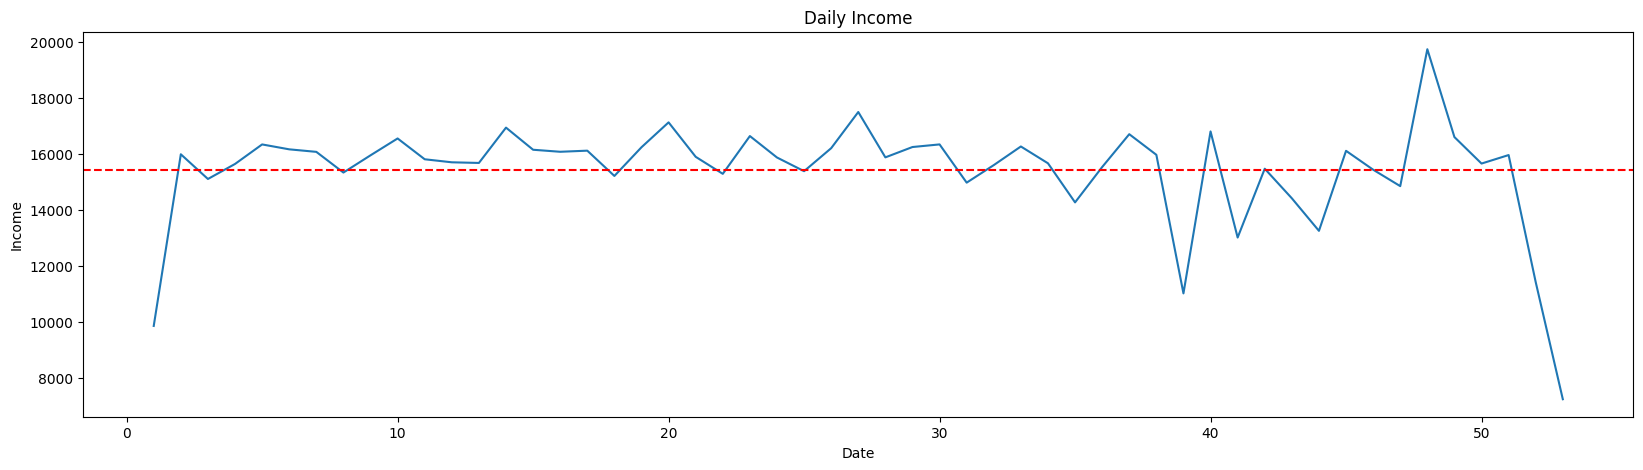

In [ ]:
#Apa yang menjadi penyebab menurunnya pendapatan berdasarkan mingguan dan bulanan?
x = df.groupby('week')['total_price'].sum().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x='week', y='total_price')
plt.title('Daily Income')
plt.xlabel('Date')
plt.ylabel('Income')

#Rata2 pendapatan harian
y = round(x['total_price'].mean(),2)
plt.axhline(y=y,
            color='r',
            linestyle='--')

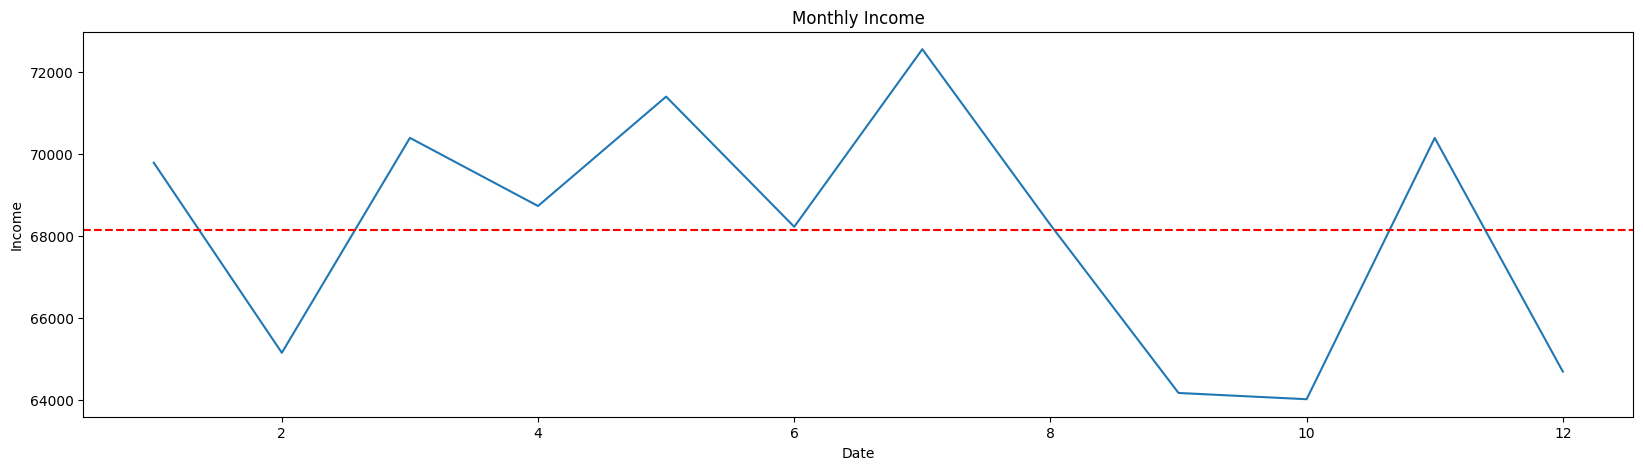

In [ ]:
x = df.groupby('month')['total_price'].sum().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x='month', y='total_price')
plt.title('Monthly Income')
plt.xlabel('Date')
plt.ylabel('Income')

#Rata2 pendapatan harian
y = round(x['total_price'].mean(),2)
plt.axhline(y=y,
            color='r',
            linestyle='--')

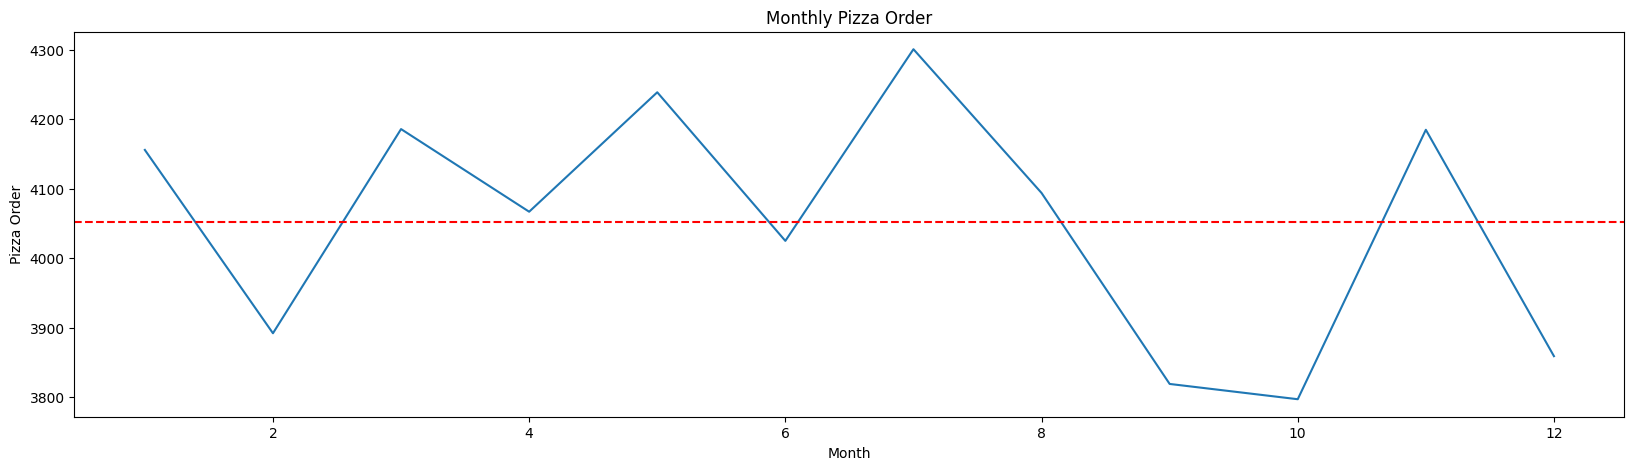

In [ ]:
x = df.groupby('month')['pizza_id'].count().reset_index()
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=x, x=x['month'], y=x['pizza_id'])
plt.xlabel('Month')
plt.ylabel('Pizza Order')
plt.title('Monthly Pizza Order')

y = round(x['pizza_id'].mean(),2)
plt.axhline(y=y,
            color='r',
            linestyle='--')

In [ ]:
'''
- Jika dilihat dari grafik diatas bahwa di bulan Februari, September, Oktober, dan Desember mengalami penurunan pendapatan di bawah rata2 pendapatan setiap bulan
- Sedangkan bulan Maret, Mei, Juli, dan November adalah bulan yang berhasil rebound dari penurunan pendatan dari bulan sebelumnya
- Sedikit aneh jika bulan Desember mengalami penurunan dibawah rata2 pendapatan bulanan, padahal di bulan tersebut terdapat 2 perayaan hari besar (natal dan tahun baru)
- Di bulan Juni mendapatkan pendapatan di atas rata2 pendapatan setiap bulan tetapi jumlah pesanan yang terjadi di bulan tersebut kurang dari nilai rata2 jumlah pesanan setiap bulan
- Mari analisis hal tersebut!
'''

'\n- Jika dilihat dari grafik diatas bahwa di bulan Februari, September, Oktober, dan Desember mengalami penurunan pendapatan di bawah rata2 pendapatan setiap bulan\n- Sedangkan bulan Maret, Mei, Juli, dan November adalah bulan yang berhasil rebound dari penurunan pendatan dari bulan sebelumnya\n- Sedikit aneh jika bulan Desember mengalami penurunan dibawah rata2 pendapatan bulanan, padahal di bulan tersebut terdapat 2 perayaan hari besar (natal dan tahun baru)\n- Di bulan Juni mendapatkan pendapatan di atas rata2 pendapatan setiap bulan tetapi jumlah pesanan yang terjadi di bulan tersebut kurang dari nilai rata2 jumlah pesanan setiap bulan\n- Mari analisis hal tersebut!\n'

In [ ]:
x = df.groupby('month')['total_price'].sum().reset_index()
x['diff_income'] = x['total_price'].diff()
x

,month,total_price,diff_income
0,1,69793.30,NaN
1,2,65159.60,-4633.70
2,3,70397.10,5237.50
3,4,68736.80,-1660.30
4,5,71402.75,2665.95
5,6,68230.20,-3172.55
6,7,72557.90,4327.70
7,8,68278.25,-4279.65
8,9,64180.05,-4098.20
9,10,64027.60,-152.45


In [ ]:
x = df.groupby('month')['pizza_id'].count().reset_index()
x

,month,pizza_id
0,1,4156
1,2,3892
2,3,4186
3,4,4067
4,5,4239
5,6,4025
6,7,4301
7,8,4094
8,9,3819
9,10,3797


In [ ]:
x = df.groupby(['month', 'pizza_size'])['pizza_id'].count().reset_index()
x_new = x.pivot(index='month', columns='pizza_size', values='pizza_id').fillna(0).astype('int')
x_new

pizza_size,L,M,S,XL,XXL
month,,,,,
1,1599,1291,1214,50,2
2,1498,1185,1168,38,3
3,1622,1296,1224,41,3
4,1498,1371,1131,63,4
5,1630,1316,1236,54,3
6,1547,1315,1114,47,2
7,1657,1371,1223,50,0
8,1492,1319,1237,44,2
9,1481,1170,1129,36,3


In [ ]:
'''
- Gunakan market basket analysis (produk yang sering dibeli bersamaan pada bulan yang memiliki jumlah pendapatan dibawah pendapatan rata2 setiap bulannya)
- Bagaimana dampak dari penggunaan market basket analysis tersebut pada penjualan?
'''



'\n- Gunakan market basket analysis (produk yang sering dibeli bersamaan pada bulan yang memiliki jumlah pendapatan dibawah pendapatan rata2 setiap bulannya)\n- Bagaimana dampak dari penggunaan market basket analysis tersebut pada penjualan?\n'

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=f00bdf1fdeeea3d1b7befe6c48d4b65abd5c595d6b9fc19adbd3bd76dc0f96d5
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd

# Group items by each transaction
data = df[['order_id', 'pizza_name_id']]
transaksi = data.groupby('order_id')['pizza_name_id'].apply(list).tolist()

# Import and run apriori with a specified min_lift value
from apyori import apriori
rules = apriori(transactions=transaksi, min_support=0.002, min_confidence=0.05, min_lift=1.5, min_length=2, max_length=2)
results = list(rules)

# Define the inspect function to parse the results safely
def inspect(results):
    lhs = []
    rhs = []
    supports = []
    confidences = []
    lifts = []

    for result in results:
        # Check if there are ordered statistics in the result
        if len(result.ordered_statistics) > 0:
            for ordered_stat in result.ordered_statistics:
                # Check if both base and add sets have items
                if len(ordered_stat.items_base) > 0 and len(ordered_stat.items_add) > 0:
                    lhs.append(tuple(ordered_stat.items_base)[0])
                    rhs.append(tuple(ordered_stat.items_add)[0])
                    supports.append(result.support)
                    confidences.append(ordered_stat.confidence)
                    lifts.append(ordered_stat.lift)

    return list(zip(lhs, rhs, supports, confidences, lifts))

# Convert the results to a DataFrame
resultsinDataFrame = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

# Display the DataFrame
resultsinDataFrame.nlargest(10, 'Confidence')


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
5,veggie_veg_s,four_cheese_l,0.002248,0.105033,1.761548
3,sicilian_m,four_cheese_l,0.002717,0.103571,1.737038
2,ital_supr_l,four_cheese_l,0.003185,0.092517,1.551640
4,the_greek_xl,four_cheese_l,0.002342,0.091912,1.541490
0,four_cheese_m,classic_dlx_m,0.002248,0.083189,1.532427
8,sicilian_m,spicy_ital_l,0.002014,0.076786,1.506778
6,ital_supr_l,mexicana_l,0.002108,0.061224,1.548747
1,four_cheese_l,ital_supr_l,0.003185,0.053417,1.551640
7,mexicana_l,ital_supr_l,0.002108,0.053318,1.548747


In [ ]:
resultsinDataFrame.nlargest(10, 'Support')

'''
- four_cheese_l	ital_supr_l
- ital_supr_l	four_cheese_l
- sicilian_m	four_cheese_l
- the_greek_xl	four_cheese_l
- four_cheese_m	classic_dlx_m
- veggie_veg_s	four_cheese_l
- ital_supr_l	mexicana_l
- sicilian_m	spicy_ital_l
'''

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
1,four_cheese_l,ital_supr_l,0.003185,0.053417,1.551640
2,ital_supr_l,four_cheese_l,0.003185,0.092517,1.551640
3,sicilian_m,four_cheese_l,0.002717,0.103571,1.737038
4,the_greek_xl,four_cheese_l,0.002342,0.091912,1.541490
0,four_cheese_m,classic_dlx_m,0.002248,0.083189,1.532427
5,veggie_veg_s,four_cheese_l,0.002248,0.105033,1.761548
6,ital_supr_l,mexicana_l,0.002108,0.061224,1.548747
7,mexicana_l,ital_supr_l,0.002108,0.053318,1.548747
8,sicilian_m,spicy_ital_l,0.002014,0.076786,1.506778


In [ ]:
'''
- Ketika terdapat pelanggan yang membeli pizza Four Cheese ukuran L, perlu untuk menawarkan pelanggan pizza lain yakni Italian Supreme ukuran L untuk meningkatkan penjualan pizza dan
berlaku sebaliknya
- Selain itu tawarkan pelanggan yang membeli pizza Italian Supreme ukuran L dengan pizza Mexicana ukuran L untuk meningkatkan penjualan.
- Gunakan hal tersebut sebagai kampanye promosi untuk meningkatkan penjualan dan aplikasikan hal tersebut pada bulan - bulan selanjutnya untuk meningkatkan penjualan
- Promosi dapat dilaksanakan pada setiap bulannya agar menjaga stabilitas penjualan setiap bulannya, seperti misalnya tanggal 19 Februari terdapat hari Pizza Internasional
'''